# Customers' preferences

### About dataset 
The dataset contain data about **150** store of The **FOODmart**  supermarket chain, which is one of the leading grocery stores in Australia.

> Variable Name and Description:
<br>
<br>
**Sales &dollar;m:** Total Sales revenue for each supermarket for the financial year. &dollar;million.
<br>
<br>
**Wages &dollar;m:** Total Wage and salary bill for the financial year. &dollar;million.
<br>
<br>
**No. Staff:** The number of effective full-time staff employed on a weekly basis.
<br>
<br>
**Location:** <ol>
               <li> Strip: Or typical street shopping centre in a major town or city</li>
               <li> Mall: Large complex or shopping center or mall in a major town or city</li>
               <li> Country: Town of 20,000 or fewer inhabitants</li>
              </ol>
<br>
**State:** <ol>
               <li> New South Wales (NSW)</li>
               <li> Victoria (Vic)</li> 
               <li> Queensland (Qld)</li> 
               <li> South Australia (SA)</li> 
               <li> Western Australia (WA)</li>
               <li> Tasmania (Tas)</li>
               <li> Northern Territory (NT)</li>
               <li> Australian Capital Territory (ACT)</li>
           </ol>
<br>
**Age (Yrs):** The number of full years of operation of the store.
<br>
<br>
**GrossProfit:** Gross Profit for each supermarket for the financial year. &dollar;million.
<br>
<br>
**Adv.&dollar;'000:** Advertising and promotional expenses for the financial year, &dollar;'000
<br>
<br>
**Competitors:** The number of competing supermarkets in the consumer catchment area
<br>
<br>
**HrsTrading:** The total number of hours open for trading per week
<br>
<br>
**Sundays:** <ol start = "0">
             <li> Does not open Sundays </li>
             <li> Does open for trading Sundays</li>
             </ol>
<br>
**Mng-Sex:** <ol srart = "0">
             <li> Male store manager</li>
             <li>Female store manager</li>
             </ol>
<br>
**Mng-Age:** Age of the store manager, years
<br>
<br>
**Mng-Exp:** No. of years of experience in some form of junior/senior management at FOODmart
<br>
<br>
**Mng-Train:** No. of management training courses taken while employed at FOODmart
<br>
<br>
**Union%:** The proportion of the staff at the supermarket which belongs to a union.
<br>
<br>
**Car Spaces:** The number of parking spaces available to the supermarket.
<br>
<br>
**HomeDel:** Whether or not the supermarket home delivers for checkout customers. **0 means no, 1 means yes**
<br>
<br>
**Basket 2013:** Cost (&dollar;) of the basket of food items in each store at 15 July 2007
<br>
<br>
**Basket 2014:** Cost (&dollar;) of the basket of food items in each store at 15 July 2008

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats 
import plotly.express as px
from plotly.subplots import make_subplots
from matplotlib.colors import LinearSegmentedColormap

In [2]:
import warnings
warnings.filterwarnings('ignore')
color_palette = ["#AAABA8","#BC7B77","#CD9B9D","#DBC7C9","#88A795","#A59CD3"]

In [3]:
data = pd.read_excel(r"D:\FCDS\Spring2023\DataMining\StoresData.xlsx")

In [4]:
data.head()

Store No.  Sales $m  Wages $m  No. Staff Location  Loc'n (Num) State  \
0          1      12.5       2.3         60     Mall            2   NSW   
1          2      14.5       2.7         69     Mall            2   Vic   
2          3      19.0       3.1         79  Country            3   Vic   
3          4      18.2       2.6         66     Mall            2   Qld   
4          5       7.6       2.0         51    Strip            1   Qld   

   State (Num)  Age (Yrs)  GrossProfit  ...  Mng-Sex (Num)  Mng-Age  Mng-Exp  \
0            1         10        0.712  ...              0       33       12   
1            2          8        0.091  ...              0       33       16   
2            2          7        1.075  ...              0       30        9   
3            3          7        1.372  ...              0       29        9   
4            3         15        2.148  ...              0       36        4   

  Mng-Train  Union% Car Spaces  HomeDel  HomeDel (Num)  Basket:2013  \
0         2      38         46   Del:No              0          171   
1         1      38         73   Del:No              0          168   
2         2      39         64   Del:No              0          180   
3         2      38         66  Del:Yes              1          173   
4         3      40         29   Del:No              0          166   

   Basket:2014  
0          178  
1          178  
2          188  
3          180  
4          171  

[5 rows x 26 columns]

# Data Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store No.      150 non-null    int64  
 1   Sales $m       150 non-null    float64
 2   Wages $m       150 non-null    float64
 3   No. Staff      150 non-null    int64  
 4   Location       150 non-null    object 
 5   Loc'n (Num)    150 non-null    int64  
 6   State          150 non-null    object 
 7   State (Num)    150 non-null    int64  
 8   Age (Yrs)      150 non-null    int64  
 9   GrossProfit    150 non-null    float64
 10  Adv.$'000      150 non-null    int64  
 11  Competitors    150 non-null    int64  
 12  HrsTrading     150 non-null    int64  
 13  Sundays        150 non-null    object 
 14  Sundays (Num)  150 non-null    int64  
 15  Mng-Sex        150 non-null    object 
 16  Mng-Sex (Num)  150 non-null    int64  
 17  Mng-Age        150 non-null    int64  
 18  Mng-Exp   

> There is **no null values** in the dataset ,and the feature's data type is **suitable**

*Changening 'advs &dollar; 000' from thousands to millions*

In [6]:
data["Adv.$m"] = data["Adv.$'000"] / 1000

In [7]:
data.drop(columns=["Adv.$'000"],inplace = True)

In [8]:
data.shape

(150, 26)

In [9]:
data.drop_duplicates()

Store No.  Sales $m  Wages $m  No. Staff Location  Loc'n (Num) State  \
0            1      12.5       2.3         60     Mall            2   NSW   
1            2      14.5       2.7         69     Mall            2   Vic   
2            3      19.0       3.1         79  Country            3   Vic   
3            4      18.2       2.6         66     Mall            2   Qld   
4            5       7.6       2.0         51    Strip            1   Qld   
..         ...       ...       ...        ...      ...          ...   ...   
145        146      14.1       3.3         88    Strip            1    SA   
146        147       8.1       1.7         58  Country            3   NSW   
147        148      13.6       2.9         66    Strip            1    WA   
148        149      10.0       2.0         55     Mall            2    WA   
149        150      11.6       2.2         60  Country            3   ACT   

     State (Num)  Age (Yrs)  GrossProfit  ...  Mng-Age  Mng-Exp Mng-Train  \
0              1         10        0.712  ...       33       12         2   
1              2          8        0.091  ...       33       16         1   
2              2          7        1.075  ...       30        9         2   
3              3          7        1.372  ...       29        9         2   
4              3         15        2.148  ...       36        4         3   
..           ...        ...          ...  ...      ...      ...       ...   
145            4          5        0.504  ...       42        9         3   
146            1         19        0.447  ...       43       12         3   
147            5         17        2.620  ...       39        8         3   
148            5          8        1.168  ...       52       13         3   
149            8          9        0.032  ...       35        8         2   

     Union% Car Spaces  HomeDel  HomeDel (Num)  Basket:2013  Basket:2014  \
0        38         46   Del:No              0          171          178   
1        38         73   Del:No              0          168          178   
2        39         64   Del:No              0          180          188   
3        38         66  Del:Yes              1          173          180   
4        40         29   Del:No              0          166          171   
..      ...        ...      ...            ...          ...          ...   
145      35         63   Del:No              0          163          172   
146      42         35   Del:No              0          178          186   
147      45         48   Del:No              0          166          172   
148      40         34   Del:No              0          174          182   
149      39         37  Del:Yes              1          178          185   

     Adv.$m  
0     0.171  
1     0.213  
2     0.255  
3     0.287  
4     0.112  
..      ...  
145   0.253  
146   0.020  
147   0.103  
148   0.120  
149   0.102  

[150 rows x 26 columns]

> There is no duplicated rows

## Data Transformation

In this dataset categorical variables as already encoded to numerical variables

In [10]:
data[["Location","Loc'n (Num)","HomeDel","HomeDel (Num)"]]

Location  Loc'n (Num)  HomeDel  HomeDel (Num)
0       Mall            2   Del:No              0
1       Mall            2   Del:No              0
2    Country            3   Del:No              0
3       Mall            2  Del:Yes              1
4      Strip            1   Del:No              0
..       ...          ...      ...            ...
145    Strip            1   Del:No              0
146  Country            3   Del:No              0
147    Strip            1   Del:No              0
148     Mall            2   Del:No              0
149  Country            3  Del:Yes              1

[150 rows x 4 columns]

## Feature Selection

*Create a subset of the **14** numerical features in dataset*

In [11]:
numeric_col = data[['Sales $m','Wages $m','No. Staff','Age (Yrs)','GrossProfit','Adv.$m','Competitors','Mng-Age','Mng-Exp','Mng-Train','Union%','Car Spaces','Basket:2013','Basket:2014']]

In [12]:
numeric_col.shape

(150, 14)

In [13]:
numeric_col.describe()

Sales $m    Wages $m   No. Staff   Age (Yrs)  GrossProfit  \
count  150.000000  150.000000  150.000000  150.000000   150.000000   
mean    11.659333    2.376667   61.493333    8.846667     1.009953   
std      3.570989    0.567866   14.605206    5.442483     0.645794   
min      5.900000    1.500000   35.000000    1.000000     0.018000   
25%      8.825000    1.900000   51.000000    4.250000     0.511000   
50%     10.950000    2.200000   58.000000    7.500000     0.975000   
75%     14.000000    2.700000   69.750000   12.000000     1.415000   
max     23.500000    3.900000  117.000000   24.000000     2.872000   

           Adv.$m  Competitors     Mng-Age     Mng-Exp   Mng-Train  \
count  150.000000   150.000000  150.000000  150.000000  150.000000   
mean     0.147273     2.506667   38.420000    9.253333    2.813333   
std      0.067994     1.744586    7.337748    3.985185    1.183707   
min      0.020000     0.000000   27.000000    1.000000    1.000000   
25%      0.101000     1.000000   33.000000    7.000000    2.000000   
50%      0.130500     2.000000   37.000000    9.000000    3.000000   
75%      0.196750     4.000000   43.000000   12.000000    3.000000   
max      0.369000     7.000000   61.000000   21.000000    6.000000   

           Union%  Car Spaces  Basket:2013  Basket:2014  
count  150.000000  150.000000   150.000000   150.000000  
mean    37.786667   44.186667   171.806667   178.846667  
std      4.899783   22.162725     8.005616     8.637158  
min     24.000000    8.000000   156.000000   162.000000  
25%     35.000000   26.000000   164.000000   171.000000  
50%     38.000000   39.500000   172.000000   179.000000  
75%     41.000000   58.000000   178.000000   185.000000  
max     50.000000  114.000000   201.000000   204.000000

> ***observations:***
* **Sales and Wages:** The average sales and wages of the stores in the dataset are **relatively high**, with standard deviations that suggest a **wide range of values**. <br>
This indicates that there may be large differences between stores in terms of their financial performance.<br>
* **Age (Yrs):** The average age of the stores in the dataset is **8.85 years**, which suggests that these are **relatively young** business. <br>
This could indicate that the businesses are still in a **growth phase**.<br>
* **GrossProfit and Adv. &dollar;m:** The average gross profit and advertising expenditure for the stores are **relatively low compared to their sales**, which suggests that these stores may be operating with **relatively low profit margins**.<br>
* **Competitors:** The average number of competitors for the companies is **2.51**, which indicates that these stores are operating in a **competitive environment**.<br>
* **Mng-Age, Mng-Exp, and Mng-Train:** The average age of the managers, their management experience, and the number of management training courses taken are **relatively high**, which suggests that these stores are managed by **experienced professionals**.<br>
* **Basket:2013 and Basket:2014**: The average basket values for the stores are **relatively stable** between 2013 and 2014, which suggests that there may not have been significant changes in their customer base or pricing strategies during that time period.

*Display scatterplot to detect the correlation between numerical variables*

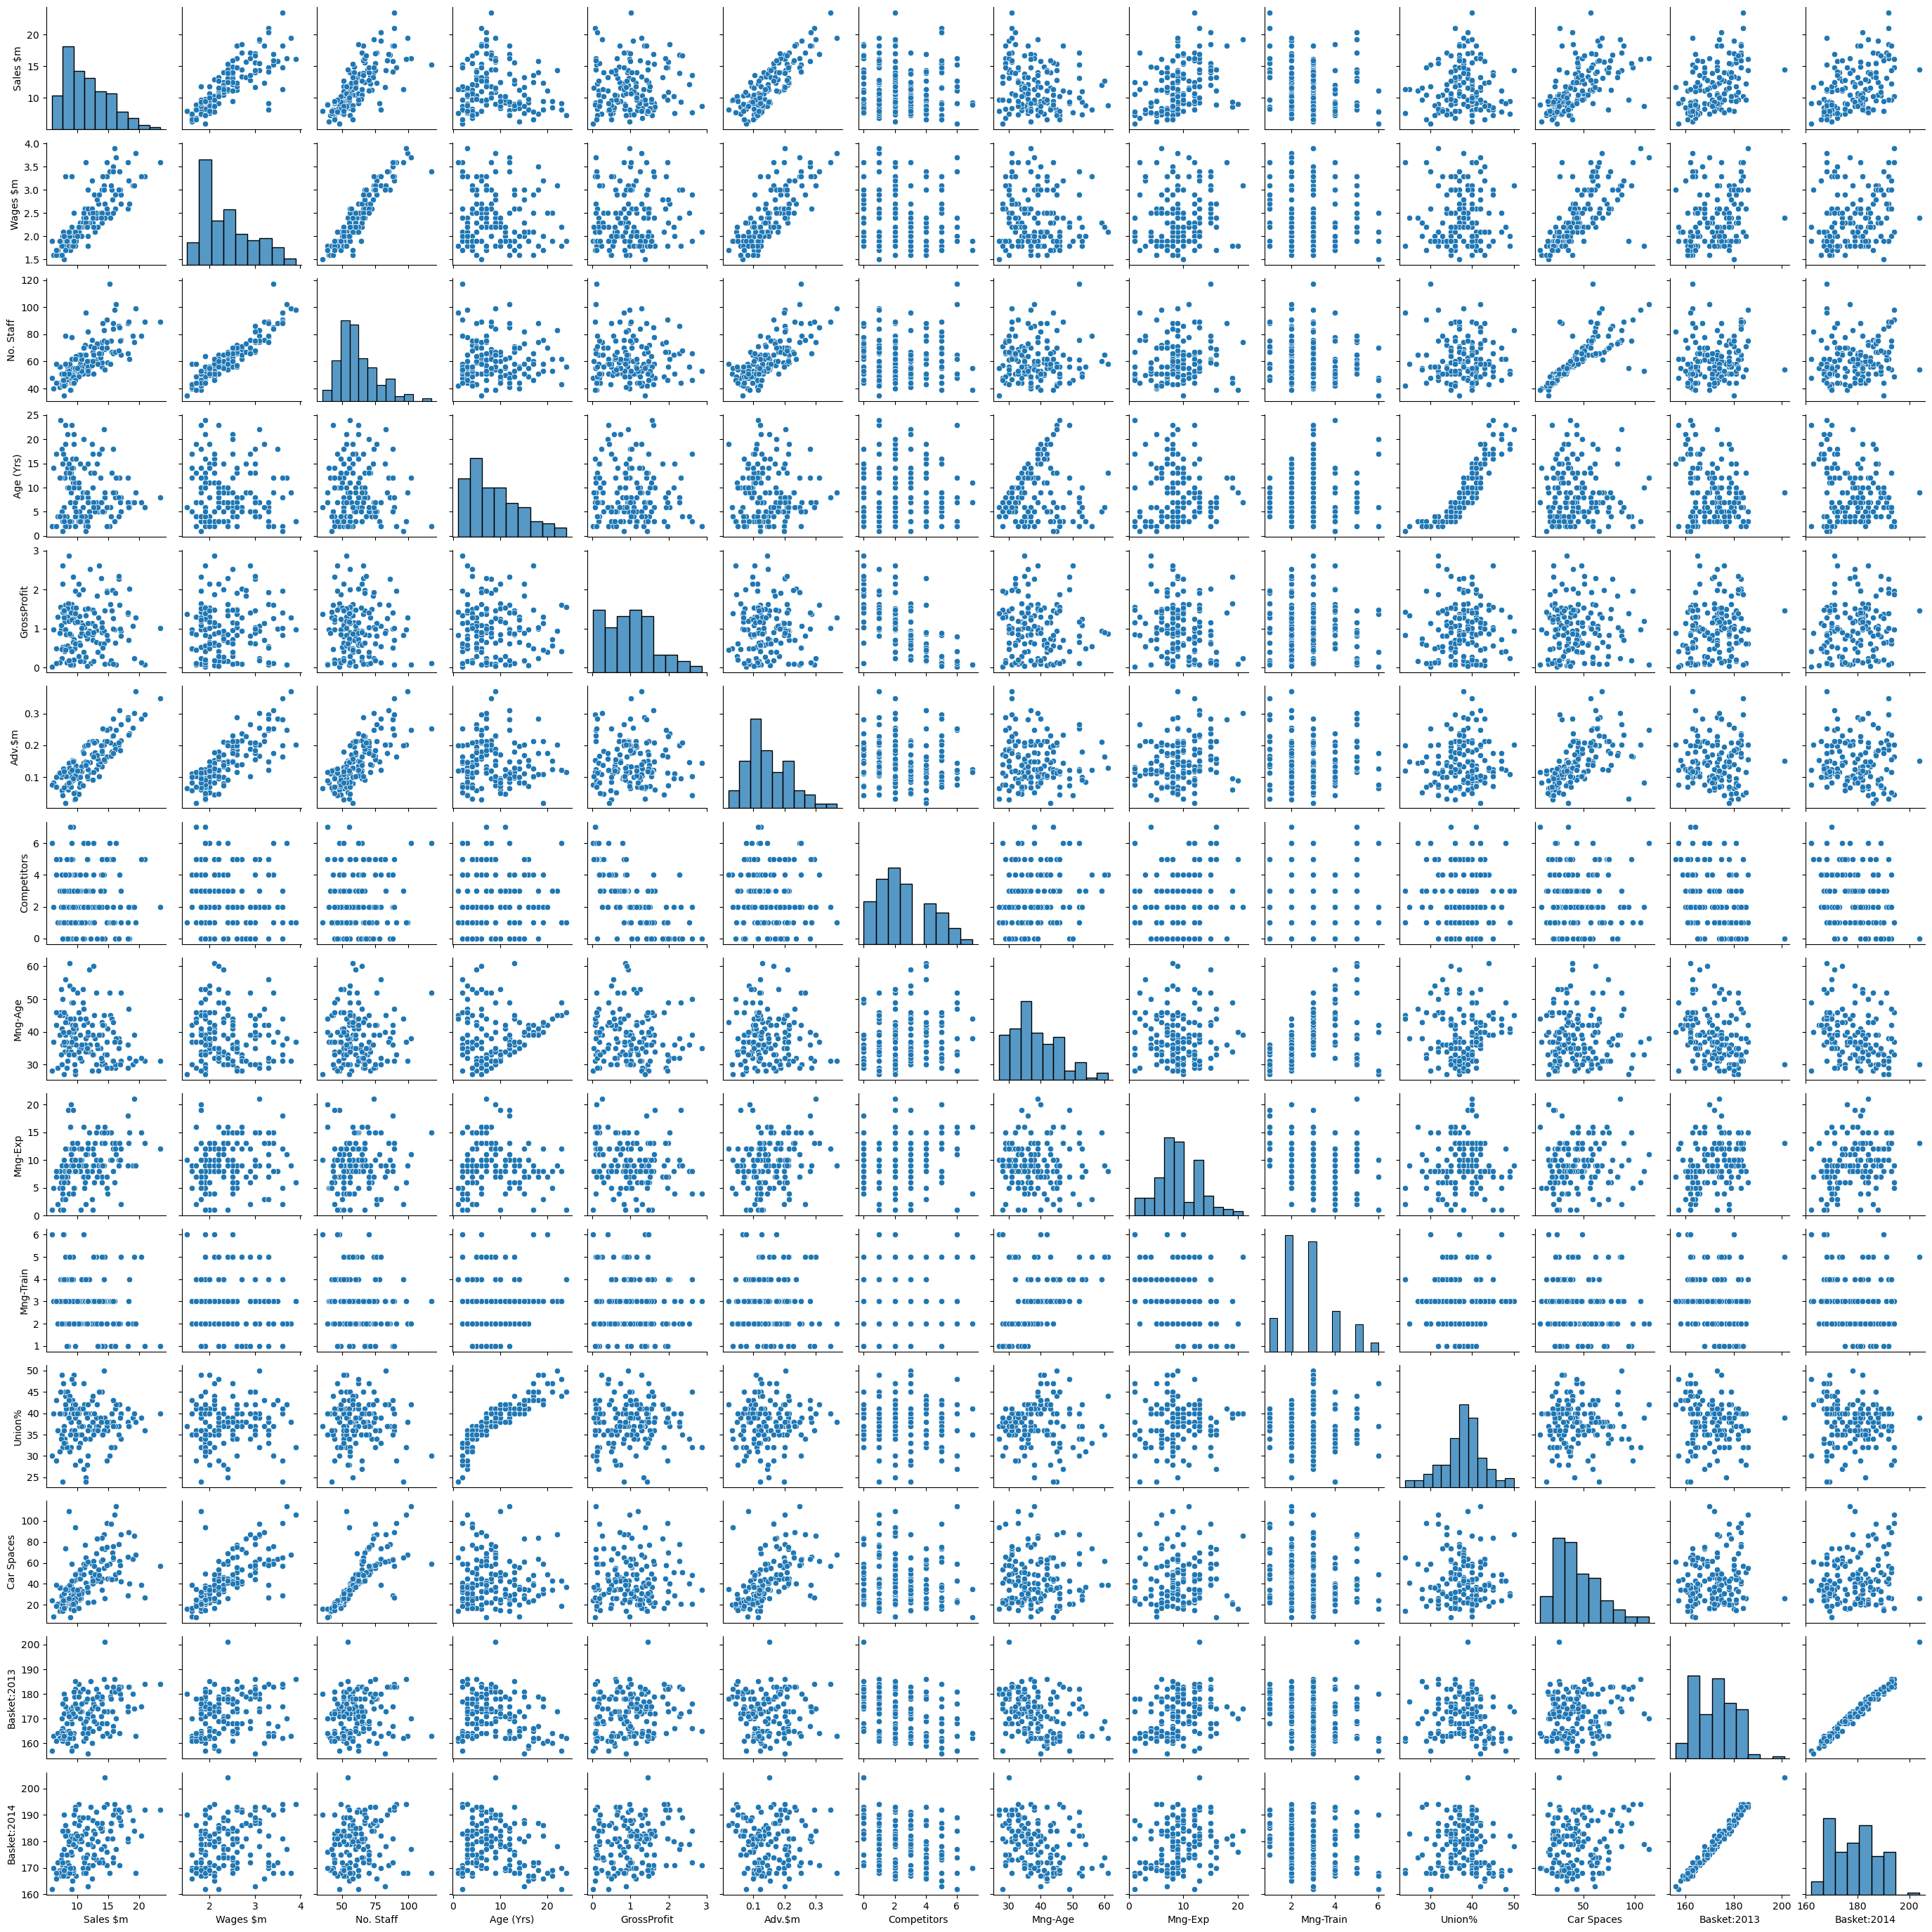

In [14]:
sns.pairplot(data = numeric_col, height = 2)  
plt.show()

> ***observed correlation:***
><ul>
	<li> Basket 2014: sales, car space, basket 2013, No. staff </li>
	<li> Basket 2013: sales, car space, basket 2013, No. staff </li>
	<li> car space: sales, wages, No. staff, Adv </li>
	<li> union: Age (Yrs) </li>
	<li> Mng-Train: Mng-Age , Mng-Exp “negative”</li>
	<li> Mng-Exp: sales </li>
    <li> Mng-age: Age (Yrs) </li>
    <li> competitors: Gross-Profit  “negative” </li>
    <li> Adv: sales, wages, No. staff </li>
    <li>No. Staff: sales , wages </li>
</ul>

## Handle outliers

*Display boxplot of numerical variables to detect the outliers*

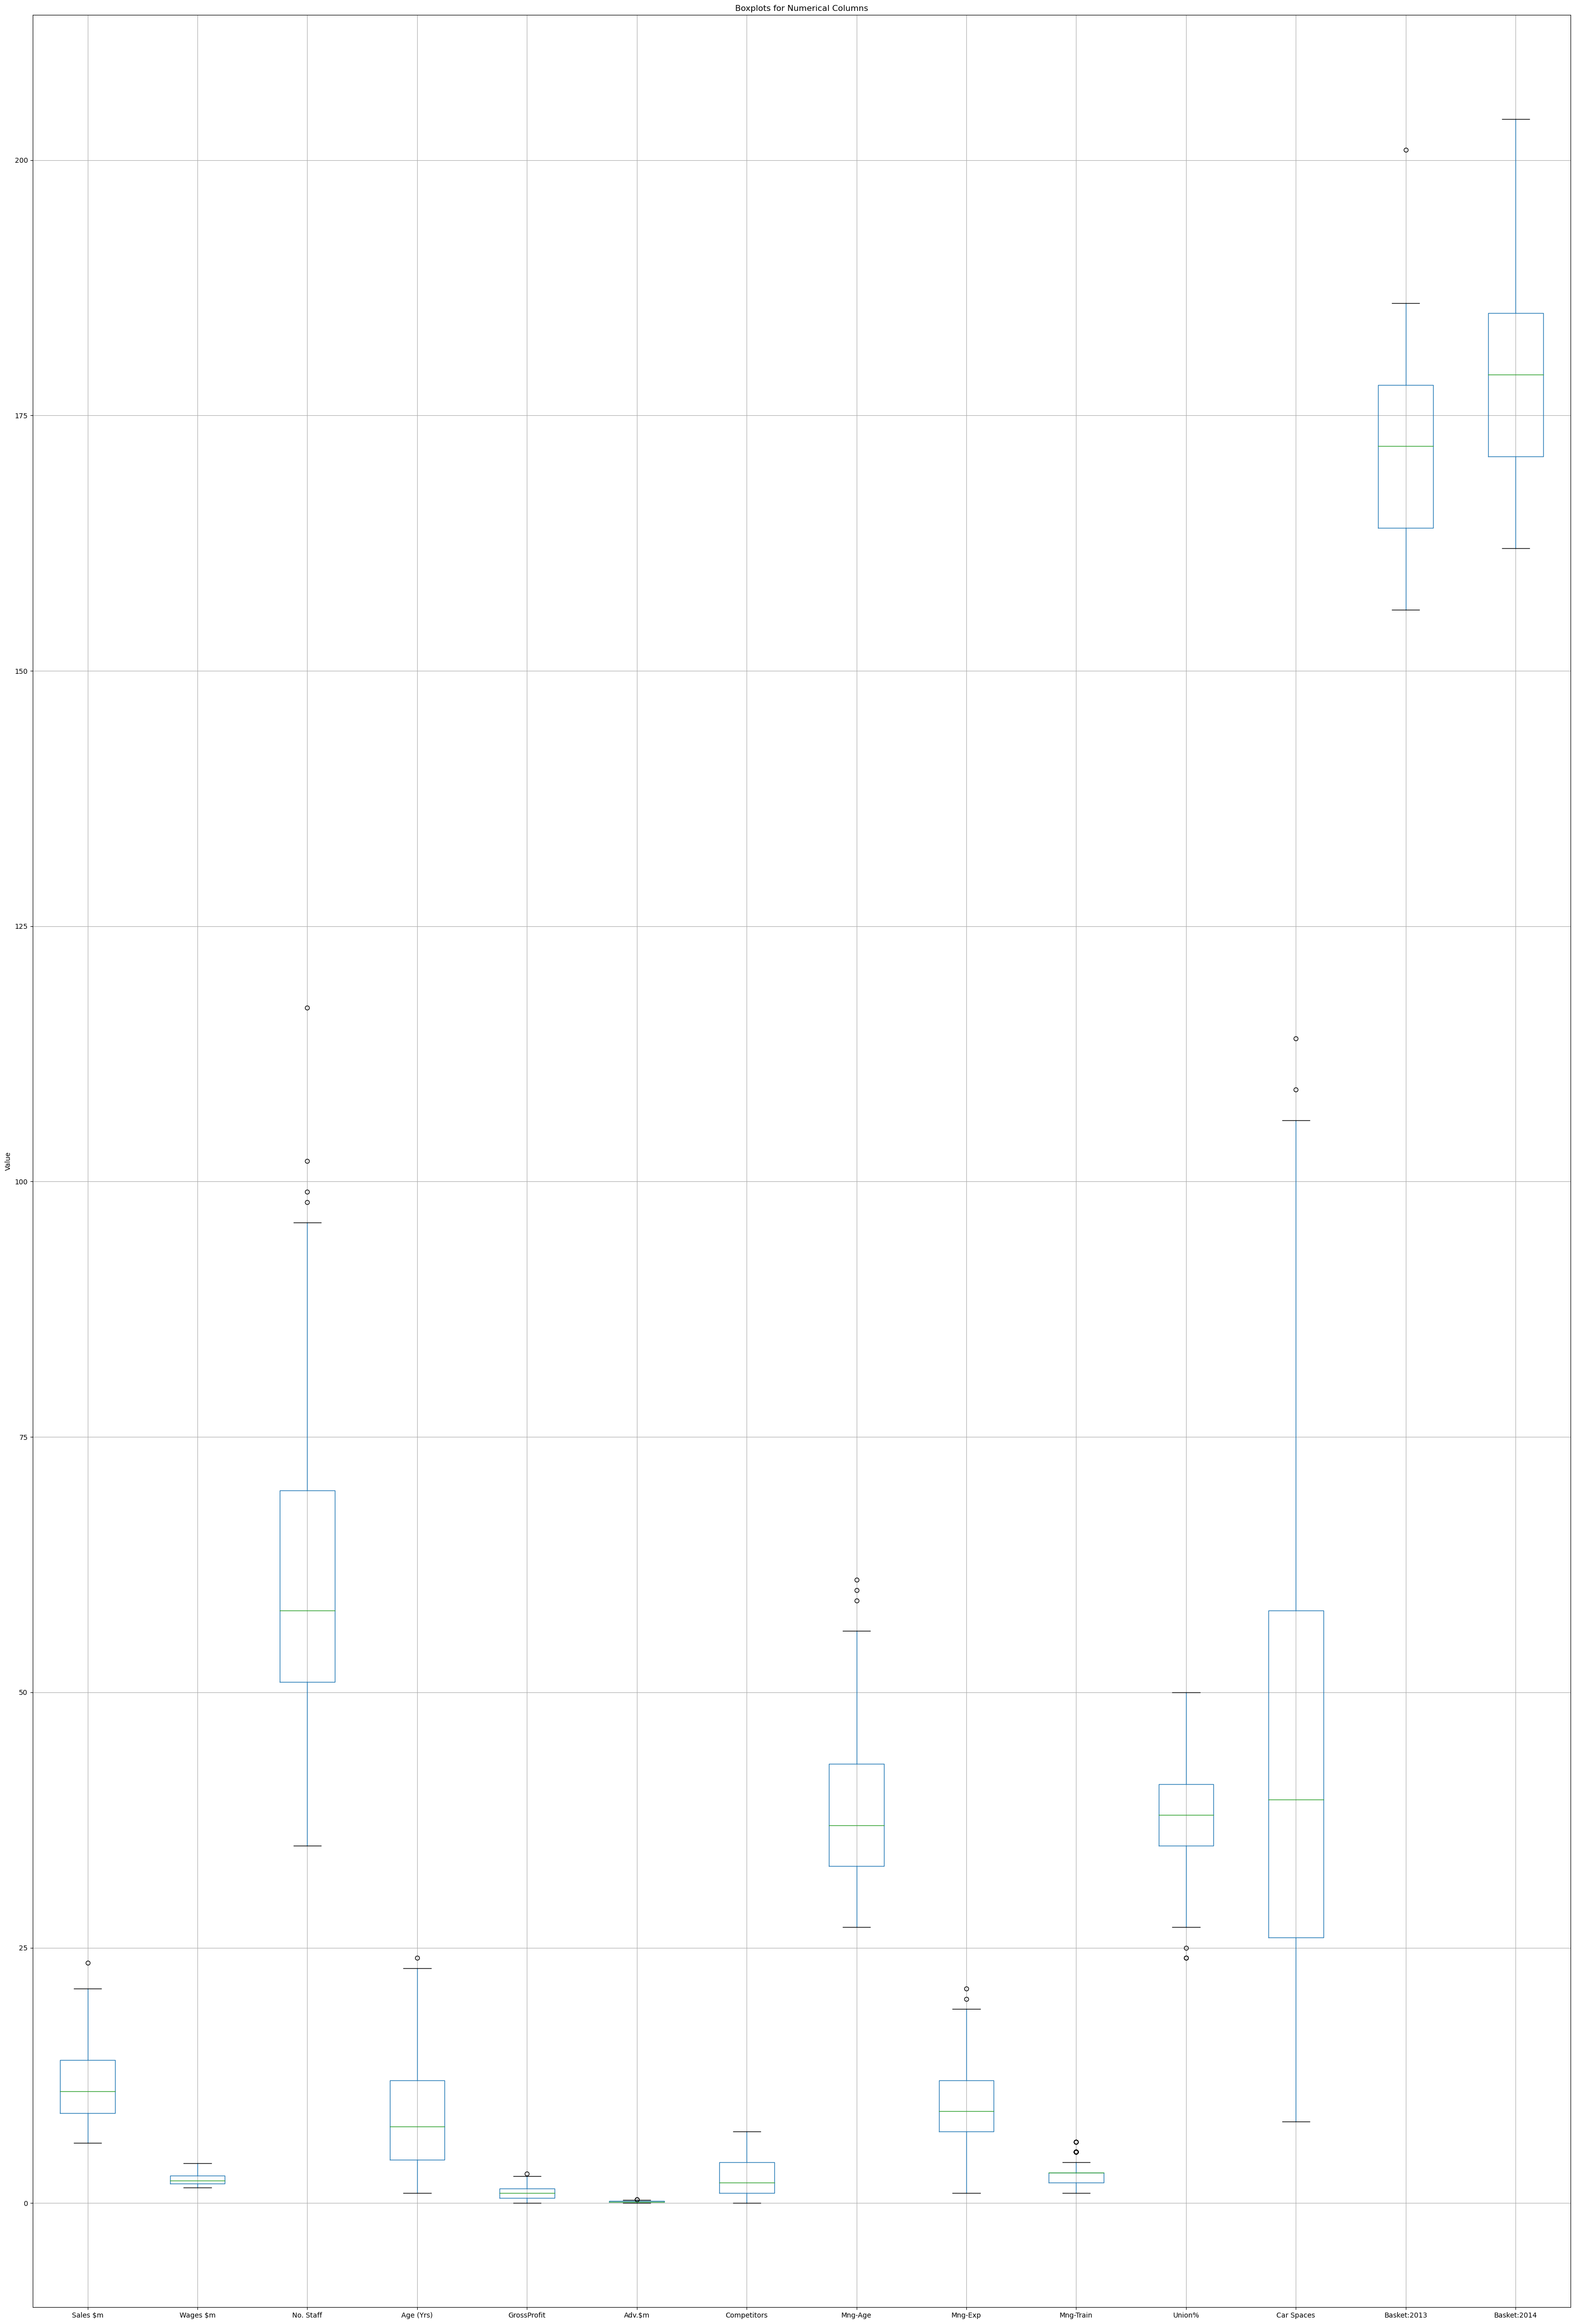

In [15]:
fig, axes = plt.subplots(figsize=(40, 60))
numeric_col.boxplot(ax=axes)

axes.set_title('Boxplots for Numerical Columns')
axes.set_ylabel('Value')

plt.show()

*Create function to identify outlier with **Z_Score** and replace it with the feature mean*

In [16]:
def cap_outliers(df, cols):
    for col in cols:
        if df[col].dtype != 'object':
            z_scores = stats.zscore(df[col])
            outliers = (z_scores < -3) | (z_scores > 3)
            df.loc[outliers, col] = df[col].mean()   
    return df

In [17]:
data = cap_outliers(data,numeric_col)

*Using the histogram to display the distribution of the numerical features after handling the outlier*

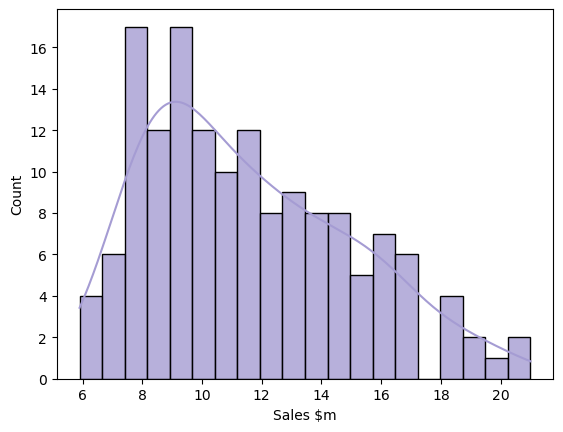

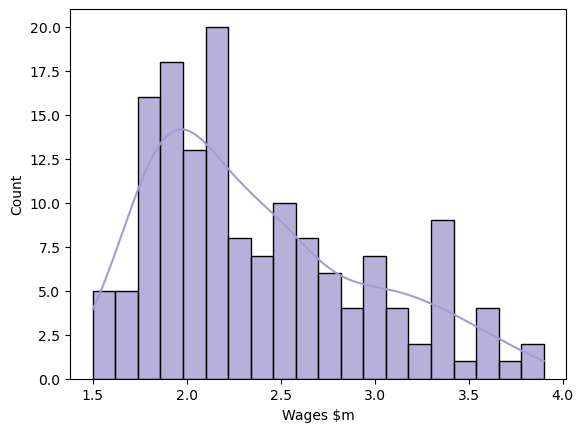

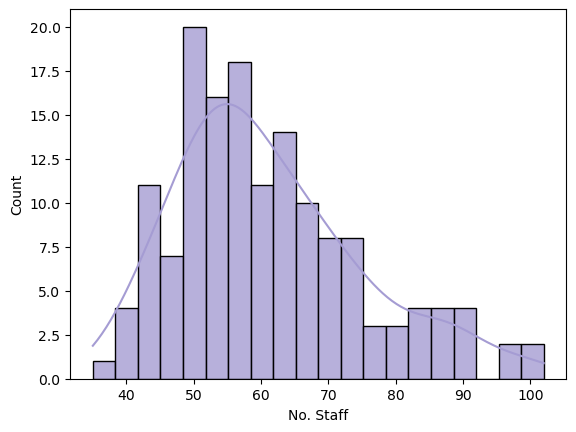

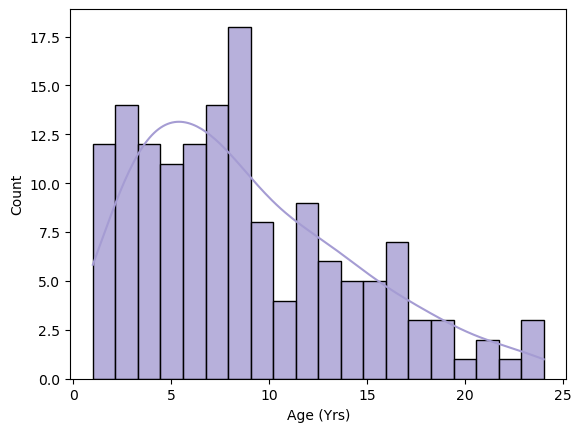

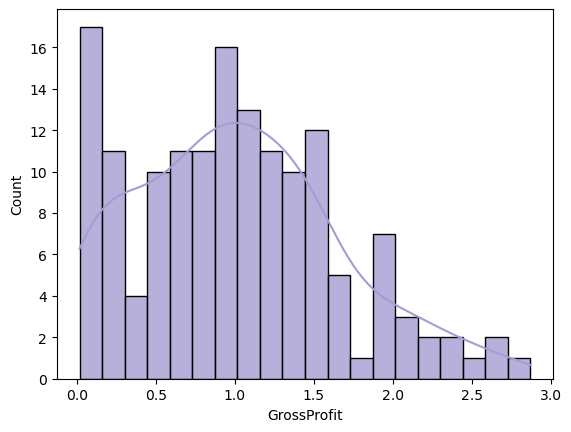

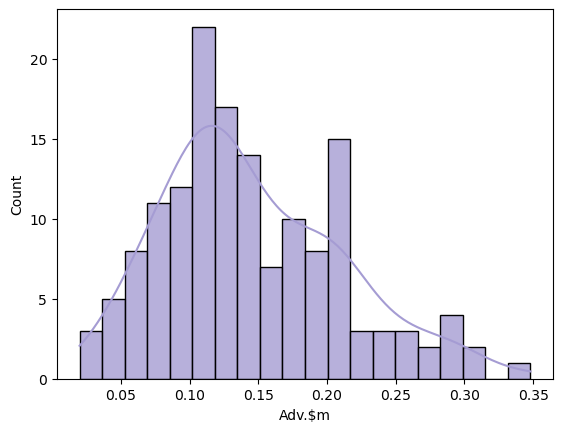

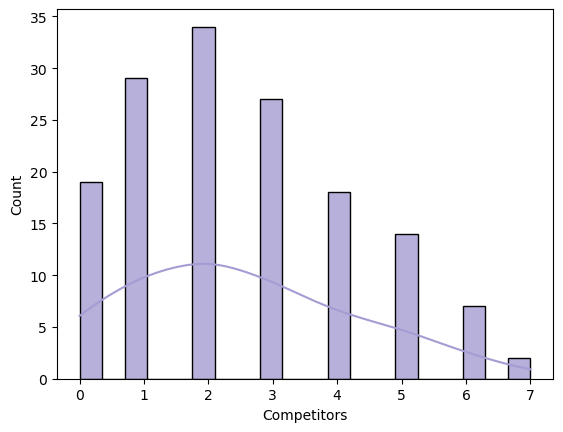

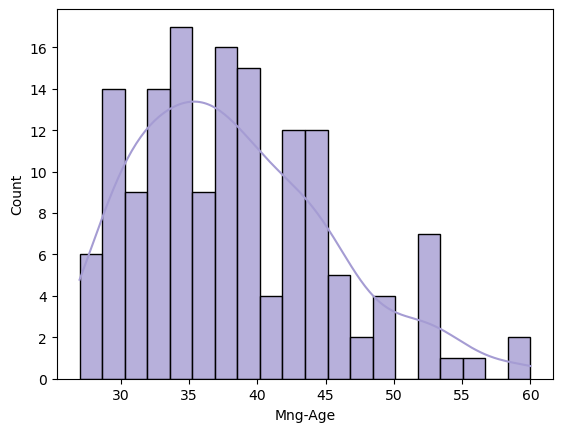

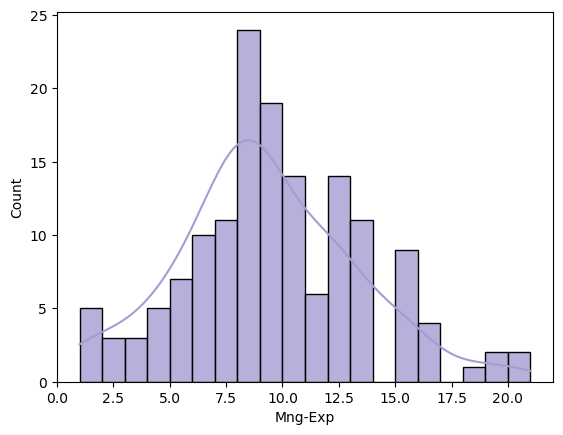

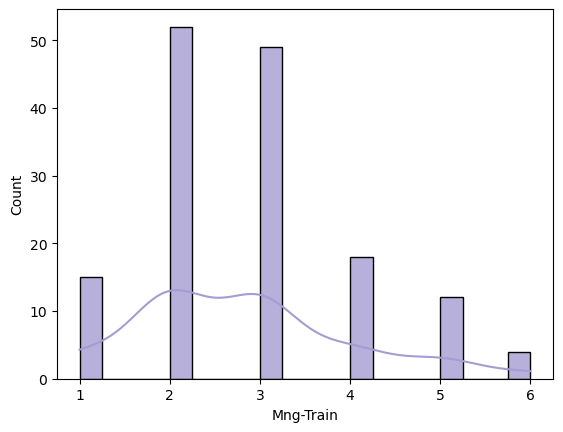

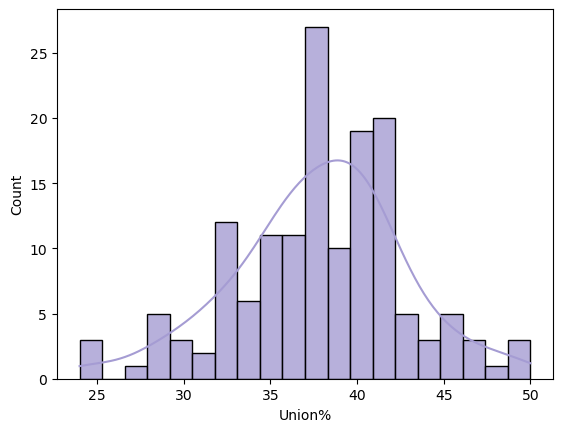

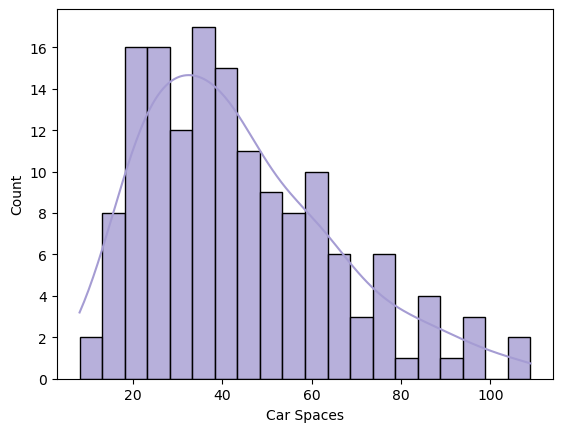

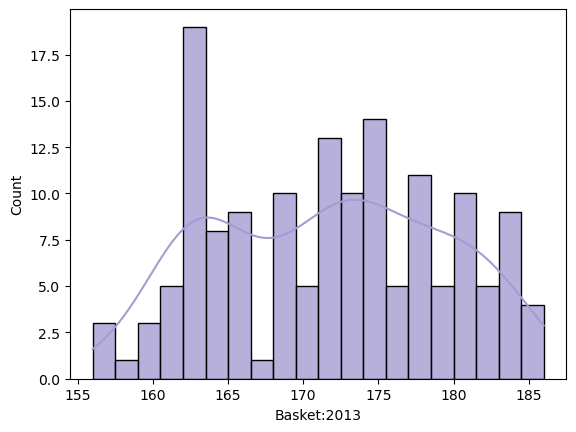

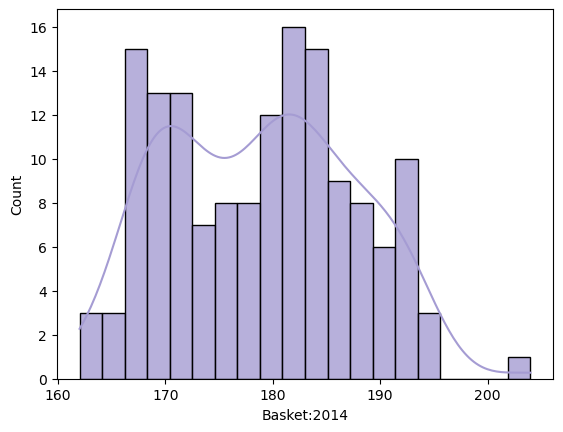

In [18]:
for col in numeric_col:
    sns.histplot(data=data, x=col, kde=True, bins=20,color='#A59CD3' , alpha=0.8)
    plt.show()

## Dimention Reduction

*Display the correlation using the heat map after removing the outlier*

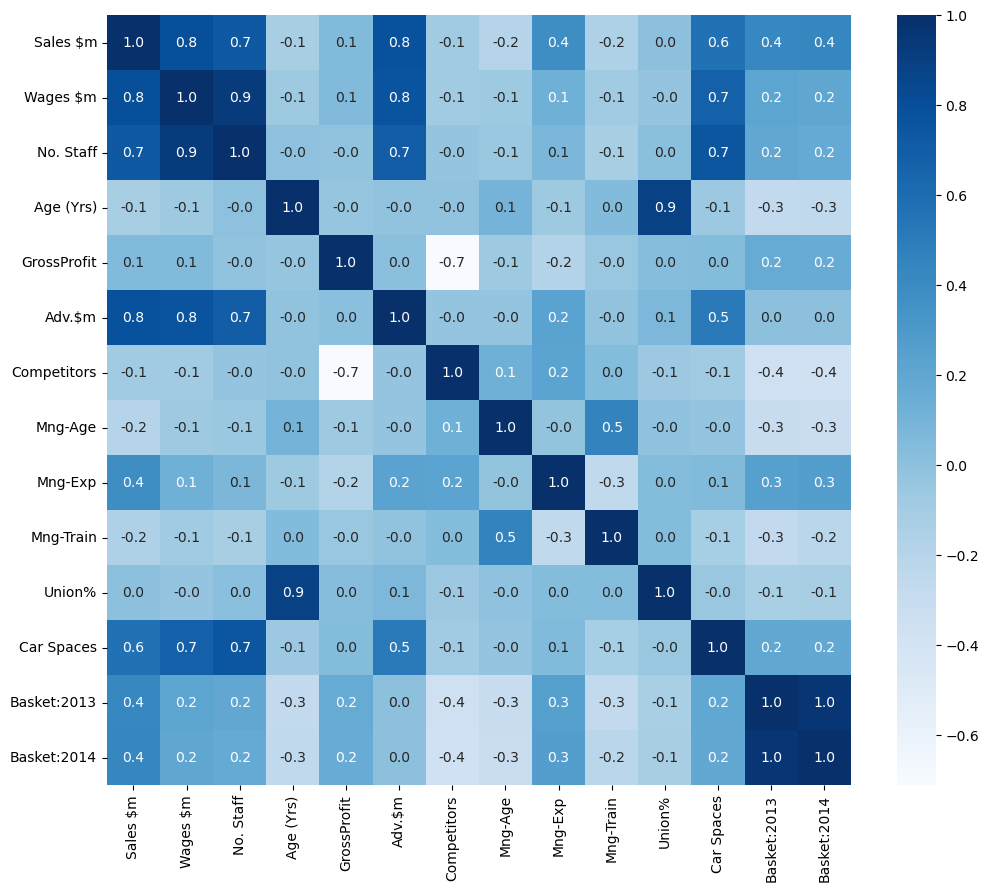

In [19]:
numeric = ['Sales $m','Wages $m','No. Staff','Age (Yrs)','GrossProfit','Adv.$m','Competitors','Mng-Age','Mng-Exp','Mng-Train','Union%','Car Spaces','Basket:2013','Basket:2014']
plt.figure(figsize=(12,10))
dataplot = sns.heatmap(data[numeric].corr(), cmap='Blues', annot=True, fmt=".1f")
plt.show()

> ***observed correlation:***
<br>
The 'basket 2013' and 'basket 2014' are very similar so, we can only use one 


In [20]:
data = data.drop('Basket:2013', axis=1)

## Exploratory Analysis

*Display the count of each category using the barchart to detect if there is any an expected values*

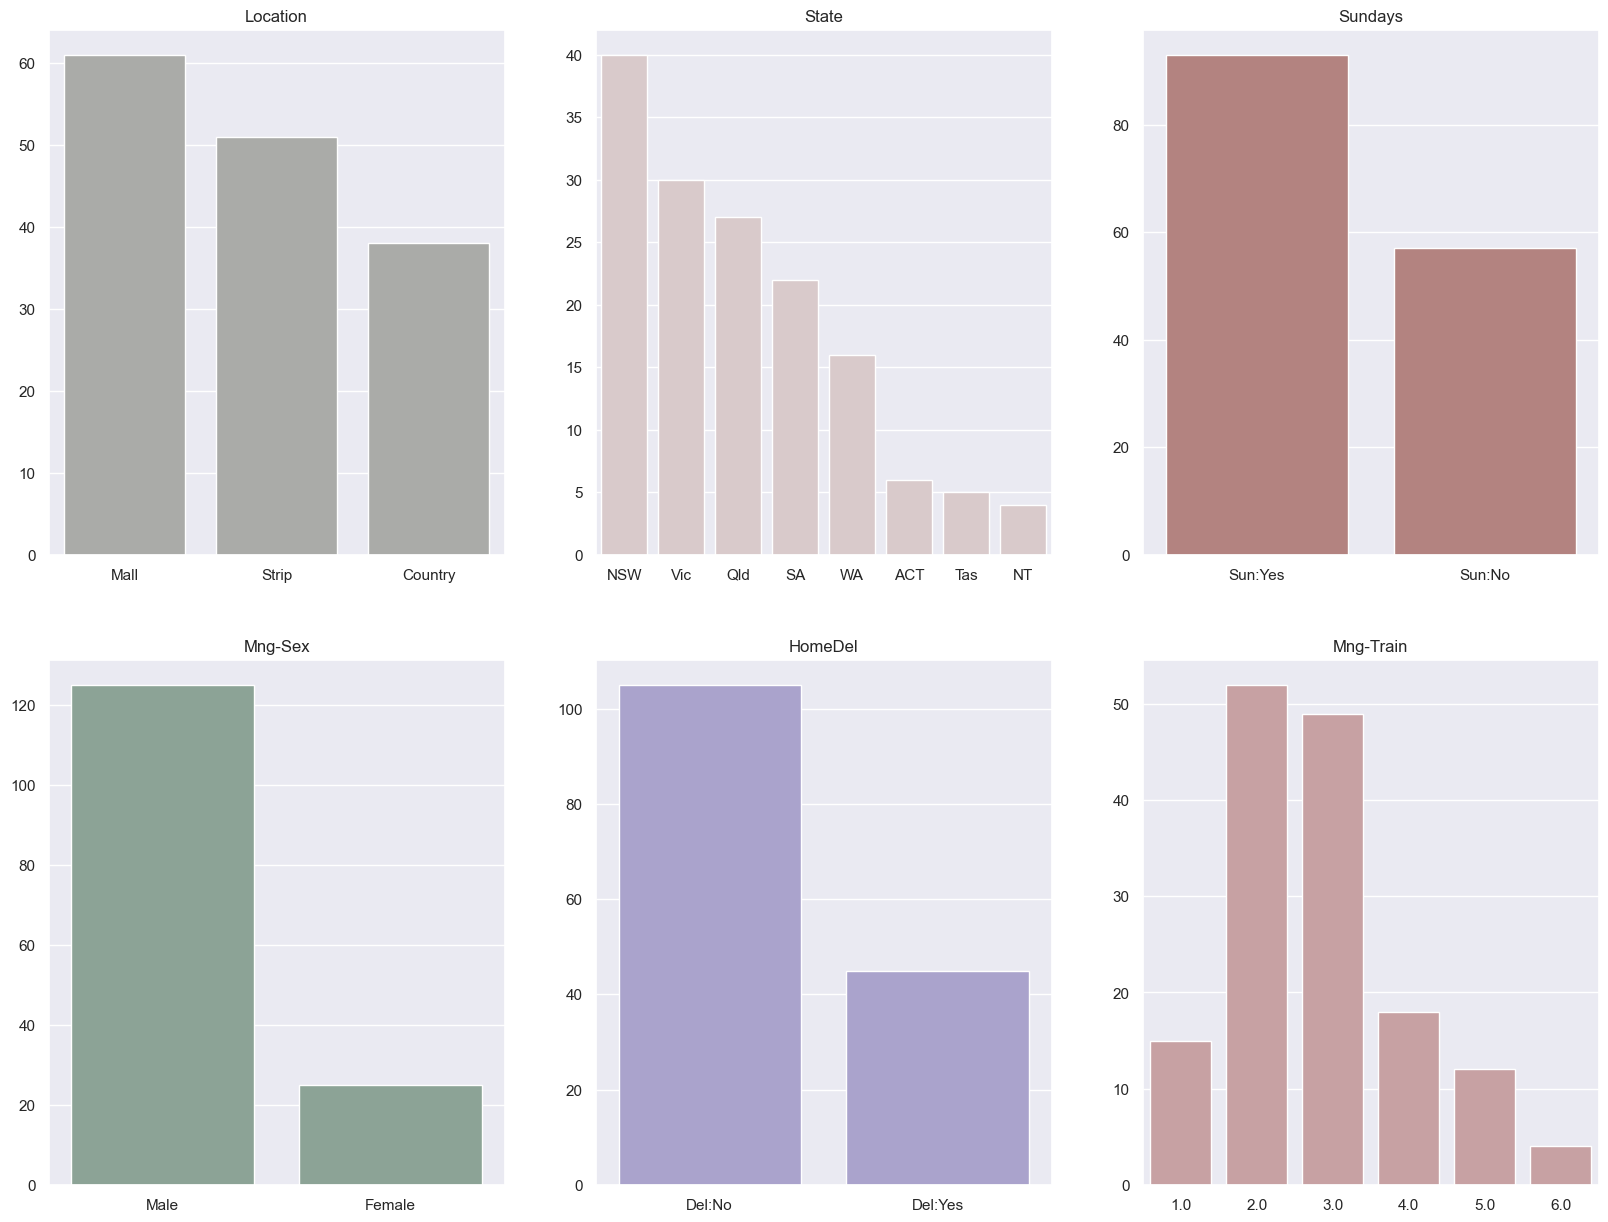

In [21]:
location_counts = data['Location'].value_counts()
State_counts = data['State'].value_counts()
Sundays_counts = data['Sundays'].value_counts()
mngSex_counts = data['Mng-Sex'].value_counts()
homeDel_counts = data['HomeDel'].value_counts()
mngTrain_counts = data['Mng-Train'].value_counts()

# Plot bar chart
sns.set(style="darkgrid")
fig, axs = plt.subplots(2,3, figsize=(20, 15))
sns.barplot(x=location_counts.index, y=location_counts.values, color="#AAABA8", ax=axs[0, 0]).set_title("Location")
sns.barplot(x=State_counts.index, y=State_counts.values, color="#DBC7C9", ax=axs[0, 1]).set_title("State")
sns.barplot(x=Sundays_counts.index, y=Sundays_counts.values, color="#BC7B77", ax=axs[0, 2]).set_title("Sundays")
sns.barplot(x=mngSex_counts.index, y=mngSex_counts.values, color="#88A795", ax=axs[1, 0]).set_title("Mng-Sex")
sns.barplot(x=homeDel_counts.index, y=homeDel_counts.values, color="#A59CD3", ax=axs[1, 1]).set_title("HomeDel")
sns.barplot(x=mngTrain_counts.index, y=mngTrain_counts.values, color="#CD9B9D", ax=axs[1, 2]).set_title("Mng-Train")

plt.show()

> ***observed about categorical features:***
<br>
    <ul>
        <li> <strong> Location: </strong> about 40% store is located in malls </li>
        <li> <strong> State: </strong> most of the stores are located in New South Wales State ,and Northern Territory State has  the least number of stores which is only <br> 10% of the hieghest state. </li>
        <li> <strong> Sundays: </strong>about 60% of the stores work the full 48 week of the finantial year </li>
        <li> <strong> Mng-Sex: </strong>about 16% of the managers are females </li>
        <li> <strong> HomeDel: </strong>only 30% of the stores have delivery services </li>
        <li> <strong> Mng-Train:</strong> most of the managers take 2 or 3 management training courses </li>
        </ul>

*Plotting the store's no. with its sales and wages*

In [22]:
fig1 = px.line(data, x='Store No.', y='Sales $m', markers=True, hover_data=['Store No.', 'Sales $m'])
fig2 = px.line(data, x='Store No.', y='Wages $m', markers=True, hover_data=['Store No.', 'Wages $m'])

fig = make_subplots(rows=2, cols=1, subplot_titles=("Sales of each store", "Wages of each store"))

fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=2, col=1)

fig.update_xaxes(title_text='Store No.', row=1, col=1)
fig.update_yaxes(title_text='Sales $m', row=1, col=1 )

fig.update_xaxes(title_text='Store No.', row=2, col=1)
fig.update_yaxes(title_text='Wages $m', row=2, col=1)

fig.update_layout(height=800, width=1000)
fig.show()

> ***observations:***
>    <ul>
	<li> Store 115 is the highest in sales at &dollar;21 million </li>
	<li> Store 40 is the lowest in sales at &dollar;5.9 million </li>
    </ul>
>    <ul>
    <li> Store 34 is the highest in wages at &dollar;3.9 million </li>
	<li> Store 28 is the lowest in wages at &dollar;1.5 million </li>
    </ul>


*Display the average cost of the main food basket for each store in 2014*

In [23]:
fig = px.line(data, x='Store No.', y='Basket:2014', markers=True, hover_data=['Store No.', 'Basket:2014'])

# Display the chart
fig.show()

> ***Observations:***
	<li> Store 39 has the highest prices compared to the other stores in 2014 with average  &dollar;204 </li>
	<li> Store 40, 131 has the lowest prices compared to the other stores in 2014 with average  &dollar;162 </li><br>
***Conclusion: Store 40 has the lowest prices and sales***

## ML Models

#### 1.Regression

* Normalize the numerical features

In [24]:
numerical_features = ['Sales $m','Wages $m','No. Staff','Age (Yrs)','GrossProfit','Adv.$m', 'Competitors',
                      'HrsTrading','Mng-Age','Mng-Exp','Mng-Train','Union%','Car Spaces','Basket:2014']

*Applying Min_Max Scaling on numerical features of data*

In [25]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

scaled_data = pd.DataFrame()

scaled_data[numerical_features] = sc.fit_transform(data[numerical_features])
scaled_data.head()

Sales $m  Wages $m  No. Staff  Age (Yrs)  GrossProfit    Adv.$m  \
0  0.437086  0.333333   0.373134   0.391304     0.243167  0.460366   
1  0.569536  0.500000   0.507463   0.304348     0.025578  0.588415   
2  0.867550  0.666667   0.656716   0.260870     0.370357  0.716463   
3  0.814570  0.458333   0.462687   0.260870     0.474422  0.814024   
4  0.112583  0.208333   0.238806   0.608696     0.746321  0.280488   

   Competitors  HrsTrading   Mng-Age  Mng-Exp  Mng-Train    Union%  \
0     0.428571    0.395833  0.181818     0.55        0.2  0.538462   
1     0.714286    0.645833  0.181818     0.75        0.0  0.538462   
2     0.285714    0.270833  0.090909     0.40        0.2  0.576923   
3     0.142857    0.135417  0.060606     0.40        0.2  0.538462   
4     0.000000    0.000000  0.272727     0.15        0.4  0.615385   

   Car Spaces  Basket:2014  
0    0.376238     0.380952  
1    0.643564     0.380952  
2    0.554455     0.619048  
3    0.574257     0.428571  
4    0.207921     0.214286

#### Multiple Linear Regression

In [26]:
from sklearn.model_selection import train_test_split

y= scaled_data['Sales $m'] 
X = scaled_data[['Wages $m', 'No. Staff', 'Adv.$m', 'Competitors', 'Car Spaces', 'Basket:2014']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*Define train and test data for multiple linear regression*

In [27]:
X_mlt_train, X_mlt_test = X_train[['Wages $m', 'Adv.$m', 'Competitors', 'Basket:2014']], X_test[['Wages $m', 'Adv.$m', 'Competitors', 'Basket:2014']]

import statsmodels.api as sm

X_mlt_train = sm.add_constant(X_mlt_train)
X_mlt_test = sm.add_constant(X_mlt_test)
model_mlt = sm.OLS(y_train, X_mlt_train).fit()

print(model_mlt.summary())

                            OLS Regression Results                            
Dep. Variable:               Sales $m   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     253.4
Date:                Thu, 18 May 2023   Prob (F-statistic):           4.90e-56
Time:                        19:10:26   Log-Likelihood:                 139.96
No. Observations:                 120   AIC:                            -269.9
Df Residuals:                     115   BIC:                            -256.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2274      0.026     -8.682      

> ***observation:***
><ul>
	<li> R-squared: The value of 0.898 indicates that the model explains <strong> 89.8% </strong> of the variability in the sales revenue. This indicates that the model has a good fit and may be useful for predicting sales.</li>
	<li> p-values for weges, advertising expenses, competitors and cost of food basket are all <strong>less than 0.05</strong>, with positive coefficients indicating a <strong> positive relationship </strong> with sales. </li>
	<li> The intercept (const) coefficient of <strong> -0.2274 </strong>suggests that when all predictor variables are equal to zero, the expected value of Sales &dollar; m is negative. </li>
    <li>it appears that advertising spending and the number of items in a basket have the strongest positive relationship with sales.</li>
    <li> The most important feature is Advertising expences due to its lagrest coefficient of <strong> 0.7289 </strong> </li>
><i><strong>These insights can help in making informed decisions about how to allocate resources to maximize sales.</strong></i>
    </ul>

*Evaluate the performance of the model on the testing set*

In [28]:
y_mlt_pred = model_mlt.predict(X_mlt_test)

mlt_mse = np.mean((y_mlt_pred - y_test)**2)
print("Mean squared error (MSE):", mlt_mse)

Mean squared error (MSE): 0.022105318573517465


In [29]:
df = pd.DataFrame({"Actual": y_test, "prediction": y_mlt_pred,  "error": y_test - y_mlt_pred})
df.reset_index(inplace = True)
df = df.sort_values("index")

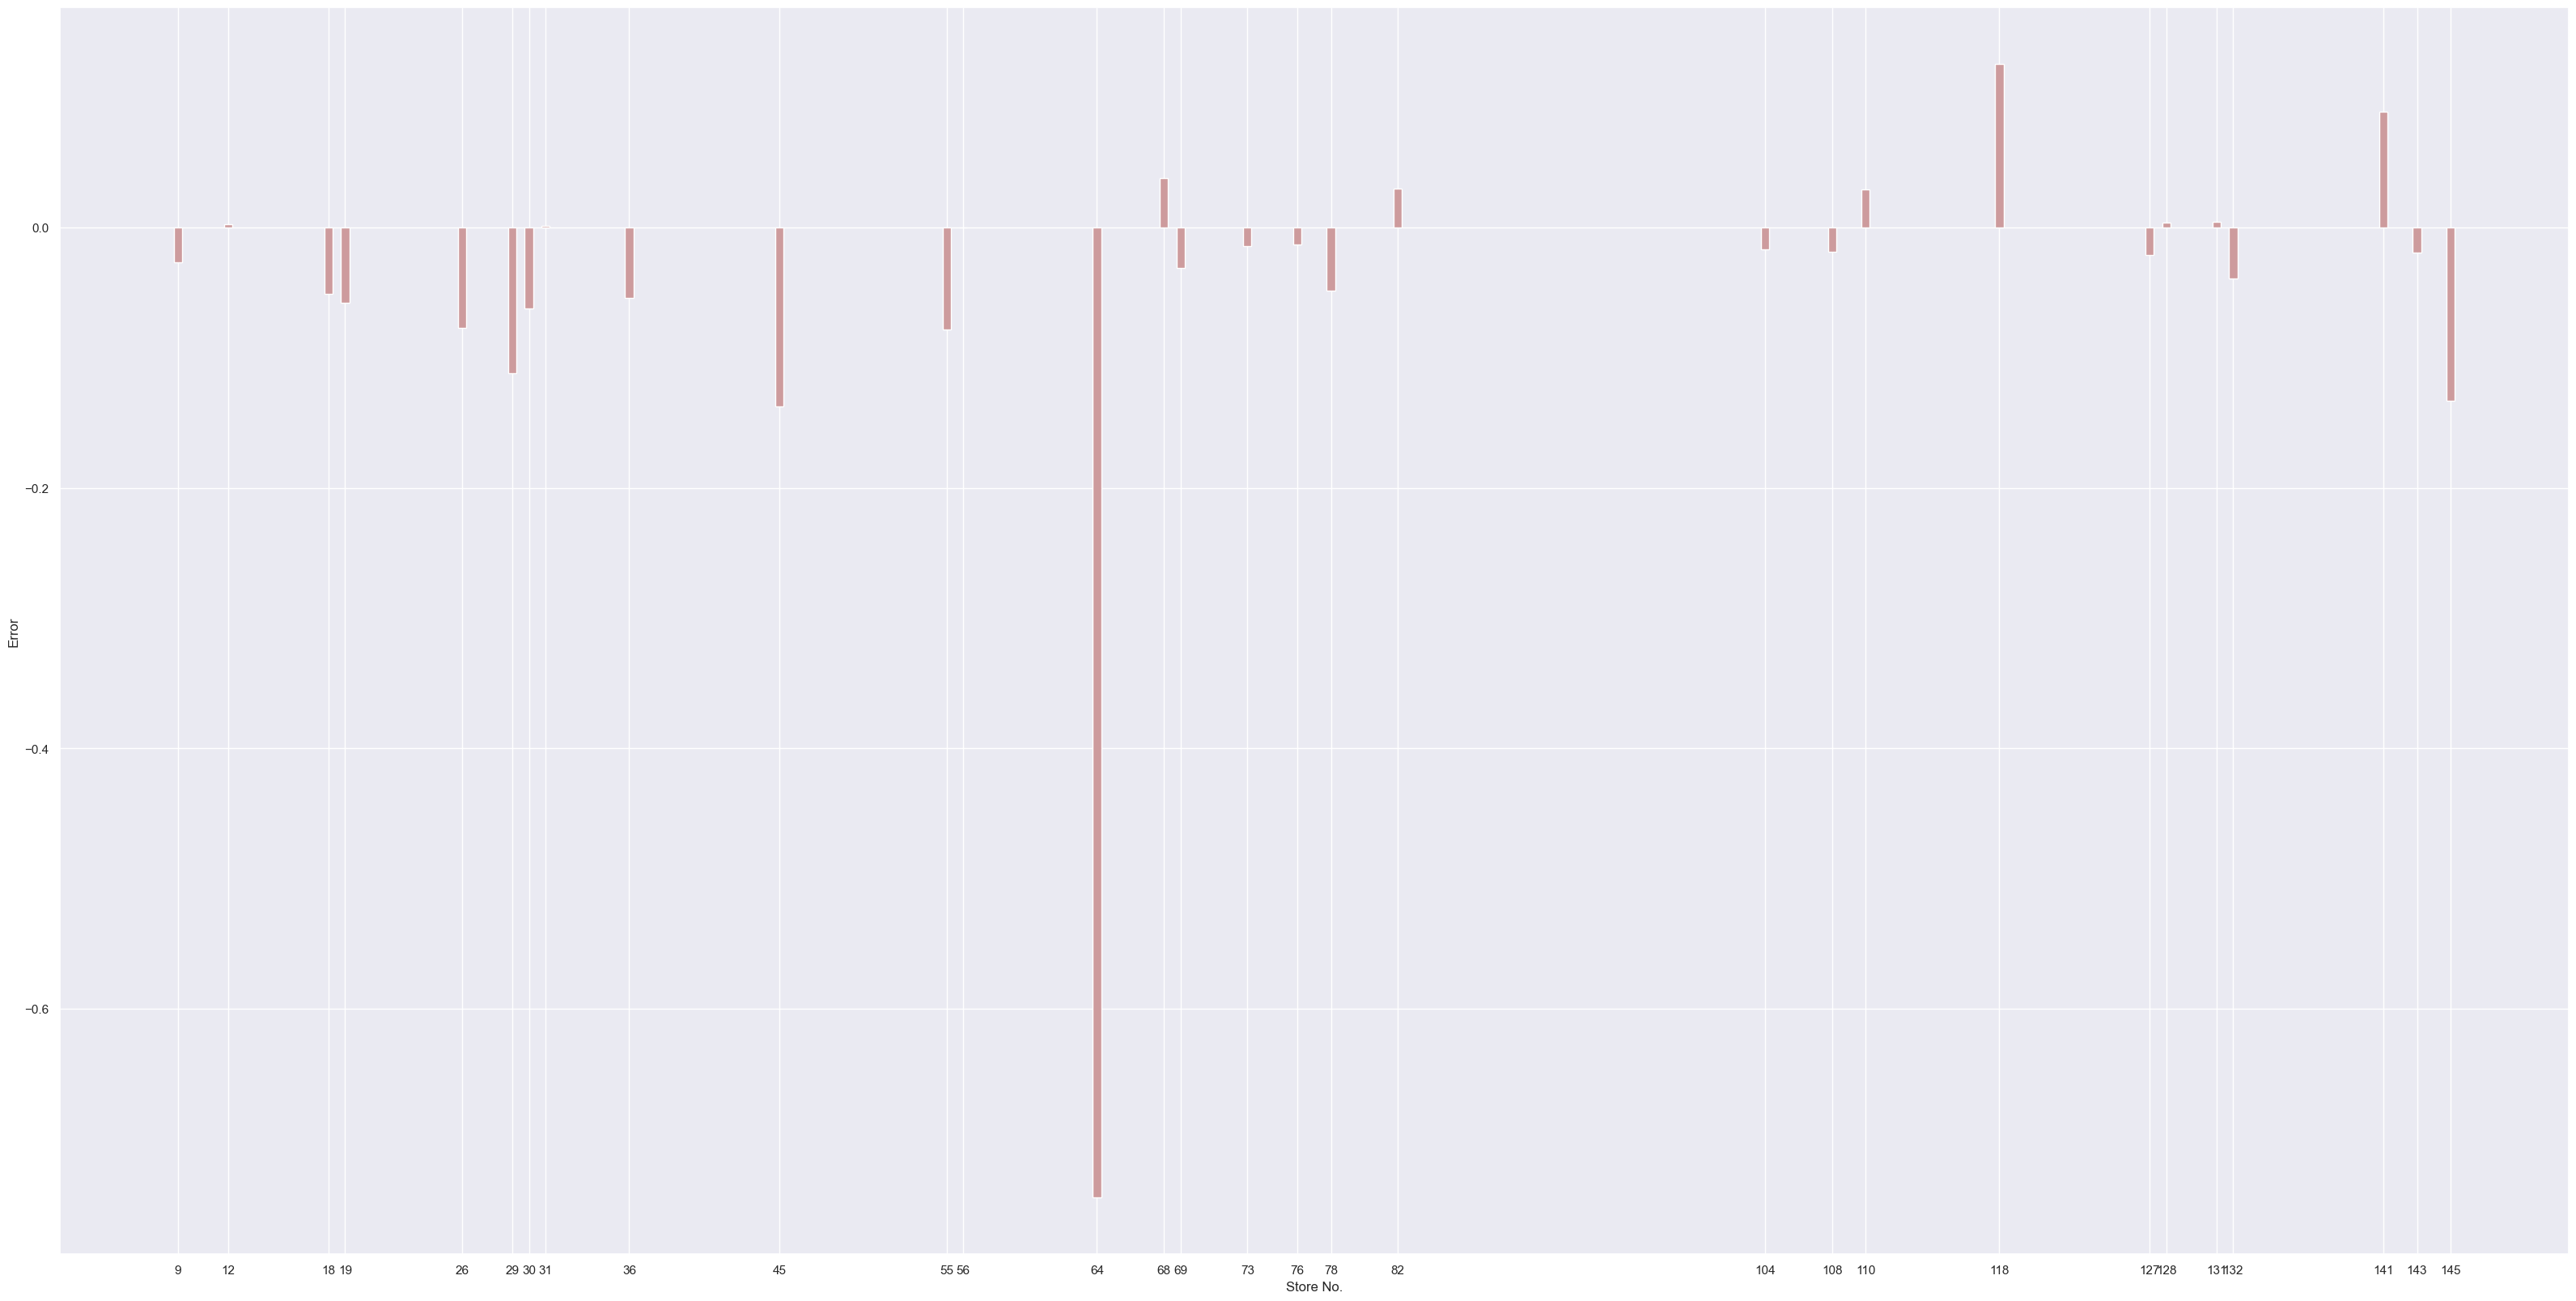

In [30]:
#plot the error values for each Store No.
fig= plt.figure(figsize=(40, 20))
plt.bar("index", "error", data=df[:150], width=0.5, color="#CD9B9D")
plt.xlabel("Store No.")
plt.ylabel("Error")
plt.xticks(df["index"])
plt.show()

> ***observations:*** <br>
Although store 64 has high potentials, its sales is lower than expected <br>
considering that store 64 is opened only 2 years ago

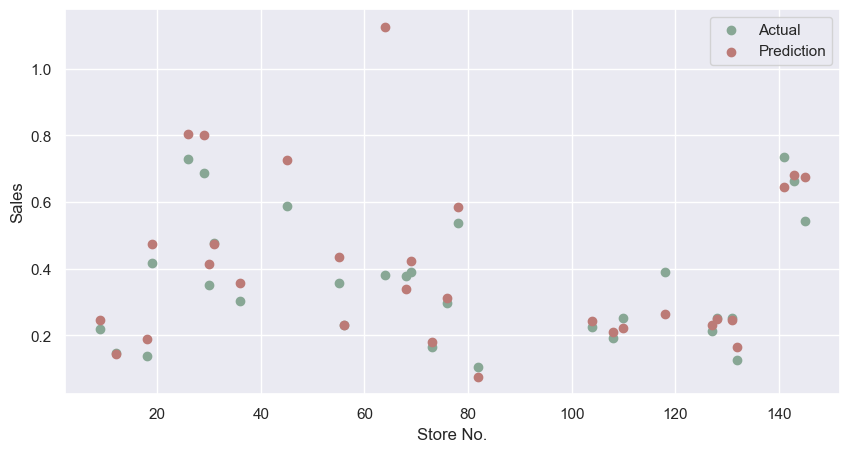

In [31]:
# Plot the actual vs. predicted values
fig= plt.figure(figsize=(10, 5))
plt.scatter(df["index"], df["Actual"], color="#88A795")
plt.scatter(df["index"], df["prediction"], color="#BC7B77") 
plt.xlabel("Store No.")
plt.ylabel("Sales")
plt.legend(["Actual", "Prediction"])
plt.show()

> ***observation:***
><ul>
	<li> in the model the stores with negative error have high feature values but low sales revenue. </li>
    <li> The mean square error is close to zero, it suggests that the model is performing well on average </li>
    </ul>

#### Single Linear Regression

*No. Staff with Sales &dollar;m*

In [32]:
x_staff = scaled_data[['No. Staff']] 

x_staff_train, x_staff_test = X_train['No. Staff'], X_test['No. Staff']

x_staff_train = sm.add_constant(x_staff_train)
x_staff_test = sm.add_constant(x_staff_test)

staff_resid_var = (y_train - sm.OLS(y_train, x_staff_train).fit().fittedvalues)**2

staff_weights = 1 / staff_resid_var

model_staff = sm.WLS(y_train, x_staff_train, weights = staff_weights).fit()

print(model_staff.summary())

                            WLS Regression Results                            
Dep. Variable:               Sales $m   R-squared:                       0.985
Model:                            WLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     7982.
Date:                Thu, 18 May 2023   Prob (F-statistic):          3.22e-110
Time:                        19:10:27   Log-Likelihood:                 127.71
No. Observations:                 120   AIC:                            -251.4
Df Residuals:                     118   BIC:                            -245.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0430      0.003     12.459      0.0

> ***observation:***
><ul>
	<li> R-squared: The value of 0.985 indicates that the model explains <strong> 98.5% </strong> of the variability in the sales revenue. This indicates that the model has a good fit and may be useful for predicting sales.</li>
	<li> p-values for the number of the effective staff is<strong> less than 0.05</strong>, with positive coefficients indicating a <strong> positive relationship </strong> with sales. </li>
	<li> The coefficient is <strong> 0.8868 </strong> suggests that when the number of effective staff increase the sales will increase by &dollar;886800 </li>

In [33]:
y_staff_pred = model_staff.predict(x_staff_test)

staff_mse = np.mean((y_staff_pred - y_test)**2)
print("Mean squared error (MSE):", staff_mse)

Mean squared error (MSE): 0.016738875088472365


> The mean square error is close to zero, it suggests that the model is performing well on average


In [34]:
df_staff = pd.DataFrame({"Actual": y_test, "prediction": y_staff_pred,  "error": y_test - y_staff_pred})
df_staff.reset_index(inplace = True)
df_staff = df_staff.sort_values("index")
df_staff

index    Actual  prediction     error
13      9  0.218543    0.307700 -0.089157
11     12  0.145695    0.148872 -0.003177
1      18  0.139073    0.254758 -0.115685
14     19  0.417219    0.519471 -0.102253
22     26  0.728477    0.704771  0.023706
20     29  0.688742    0.929778 -0.241036
29     30  0.350993    0.506236 -0.155242
5      31  0.476821    0.387114  0.089707
12     36  0.304636    0.347407 -0.042772
28     45  0.589404    0.784185 -0.194781
18     55  0.357616    0.532707 -0.175091
15     56  0.231788    0.307700 -0.075912
6      64  0.381413    0.757714 -0.376301
8      68  0.377483    0.307700  0.069783
17     69  0.390728    0.320936  0.069792
0      73  0.165563    0.201815 -0.036252
4      76  0.298013    0.254758  0.043256
3      78  0.536424    0.559178 -0.022755
9      82  0.105960    0.148872 -0.042912
16    104  0.225166    0.307700 -0.082535
26    108  0.192053    0.347407 -0.155354
10    110  0.251656    0.307700 -0.056045
2     118  0.390728    0.281229  0.109500
21    127  0.211921    0.162108  0.049813
23    128  0.251656    0.188579  0.063077
24    131  0.251656    0.400350 -0.148694
19    132  0.125828    0.188579 -0.062751
7     141  0.735099    0.572414  0.162685
27    143  0.662252    0.691535 -0.029284
25    145  0.543046    0.744478 -0.201432

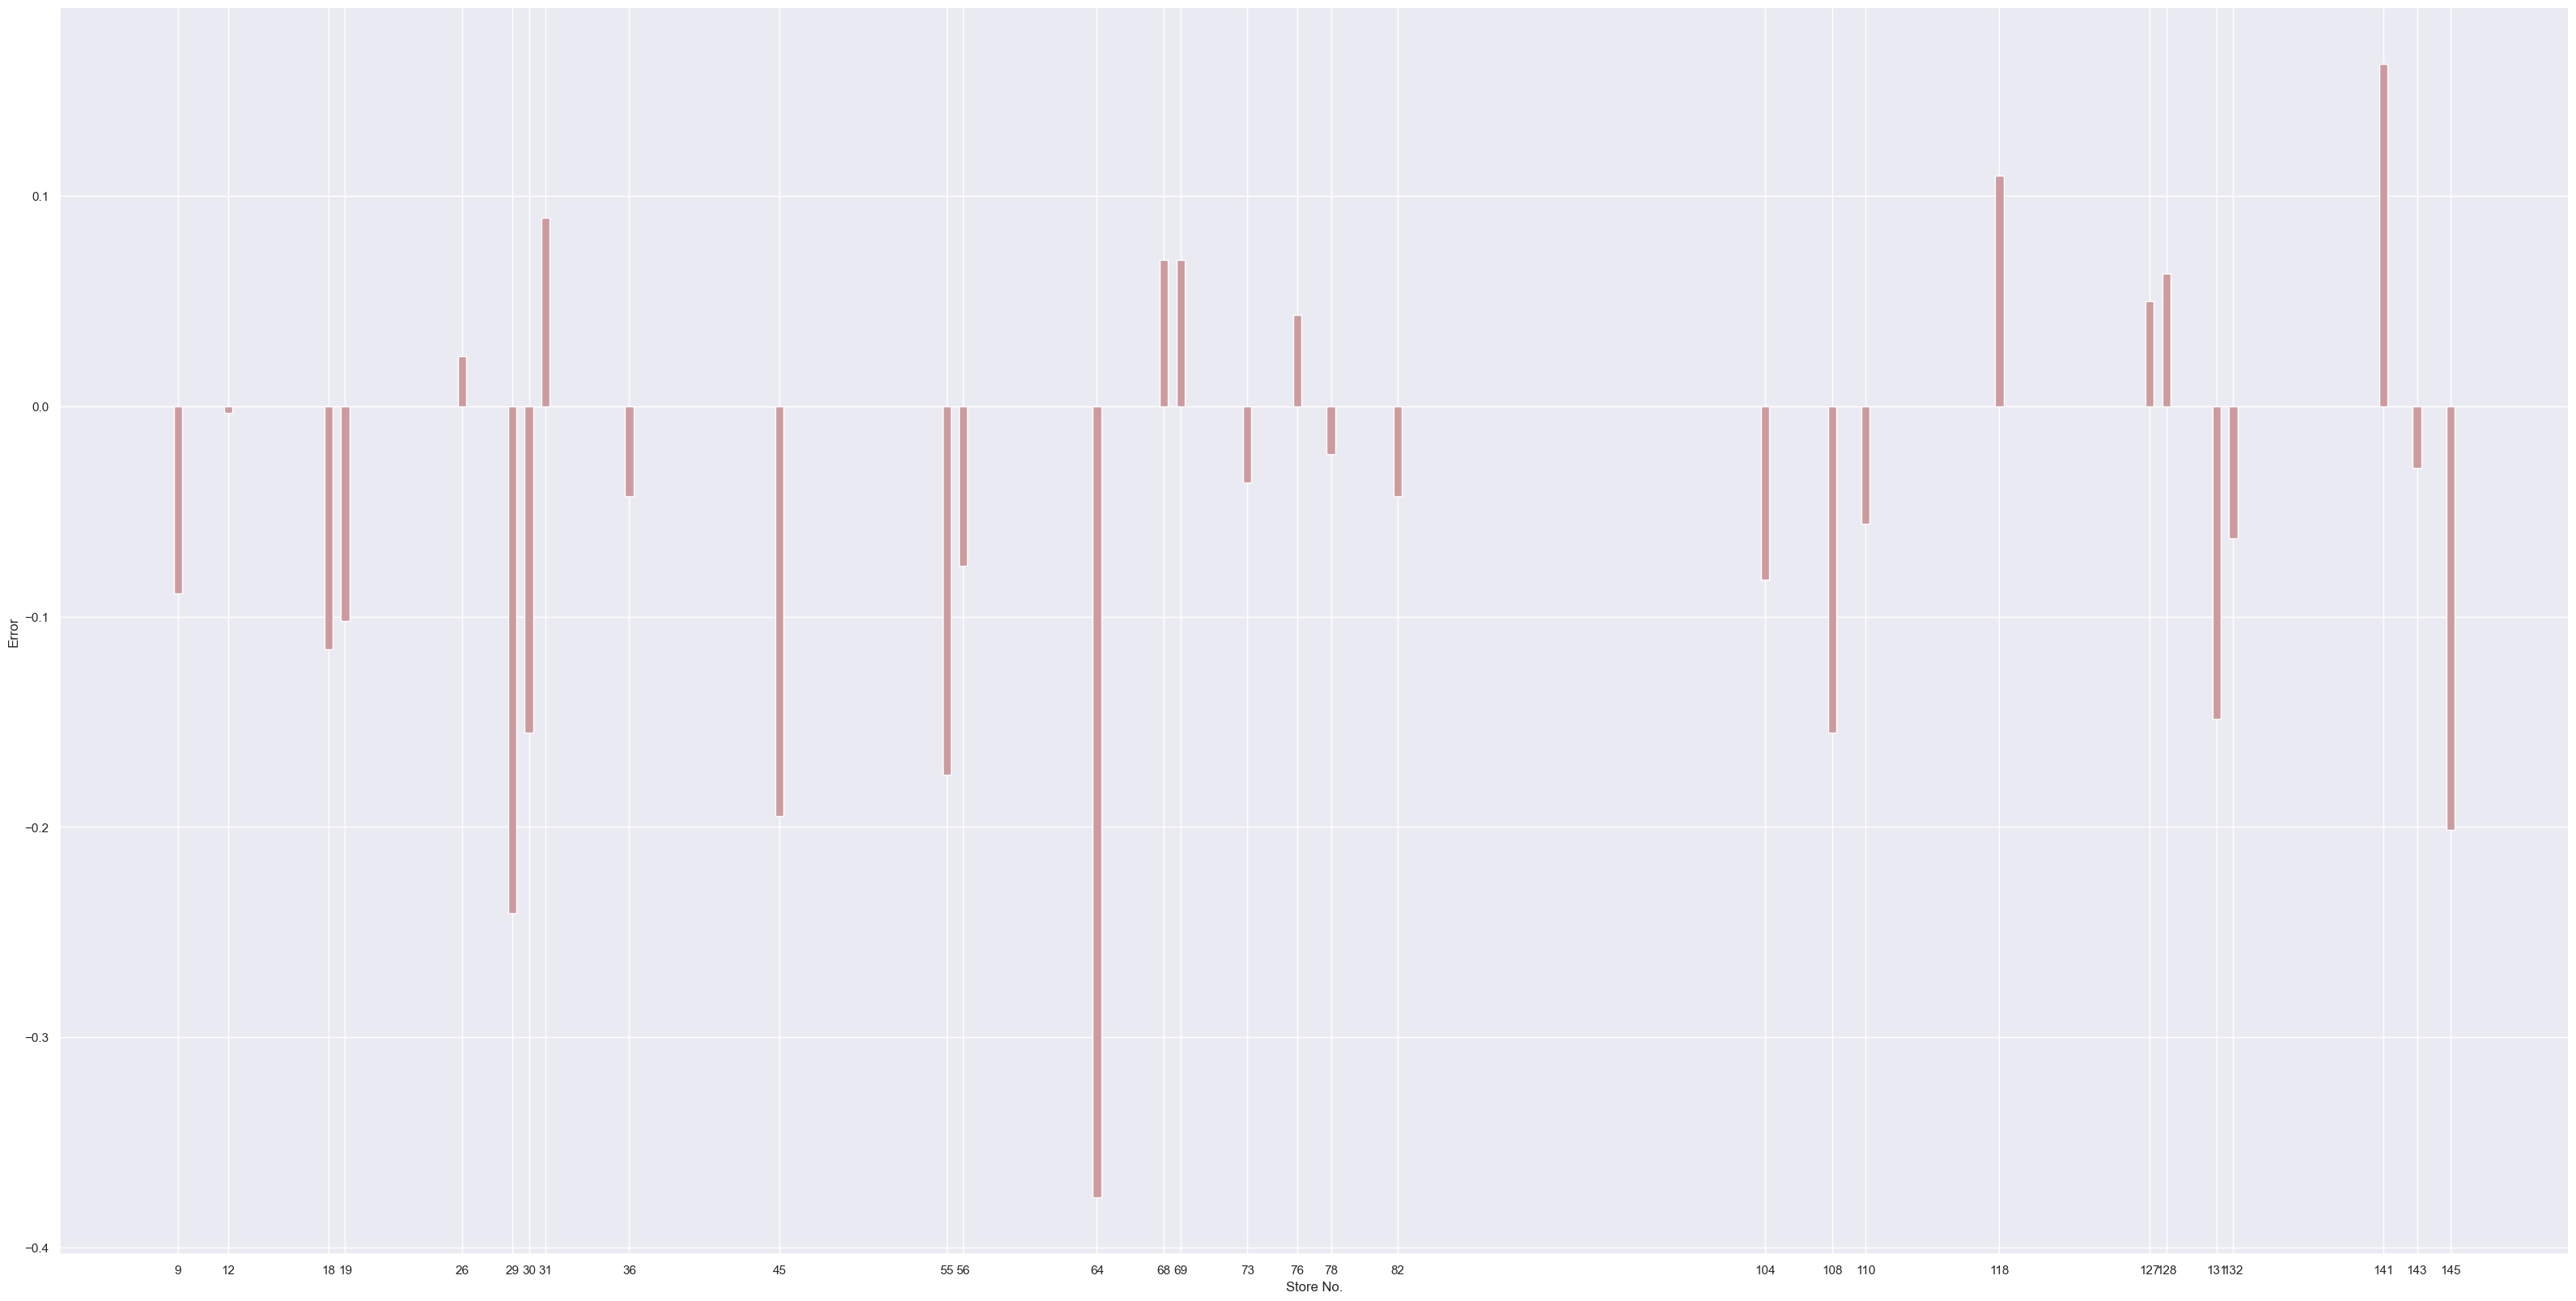

In [35]:
fig= plt.figure(figsize=(40, 20))
plt.bar("index", "error", data=df_staff[:150], width=0.5, color="#CD9B9D")
plt.xlabel("Store No.")
plt.ylabel("Error")
plt.xticks(df_staff["index"])
plt.show()

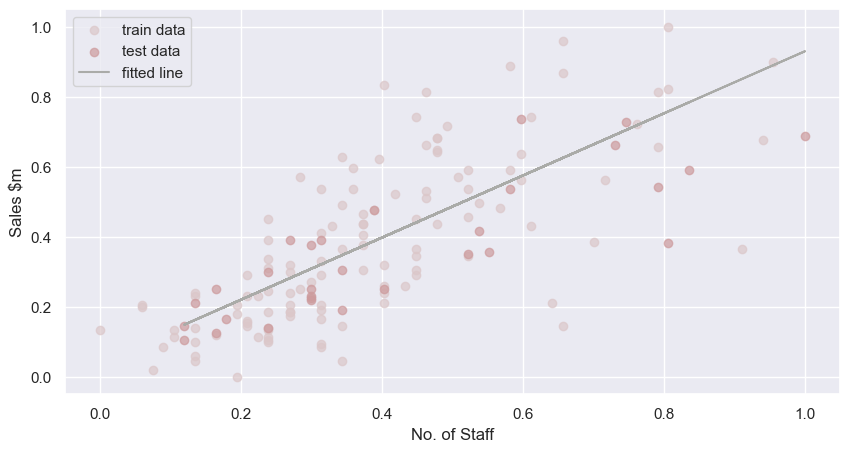

In [36]:
fig= plt.figure(figsize=(10, 5))
plt.scatter(x_staff_train['No. Staff'], y_train, edgecolor='#DBC7C9', facecolor='#DBC7C9', alpha=0.7)
plt.scatter(x_staff_test['No. Staff'], y_test, edgecolor='#CD9B9D', facecolor='#CD9B9D', alpha=0.7)
plt.plot(x_staff_test['No. Staff'], y_staff_pred, color='#AAABA8')
plt.xlabel("No. of Staff")
plt.ylabel("Sales $m")
plt.legend(["train data", "test data", "fitted line"])
plt.show()

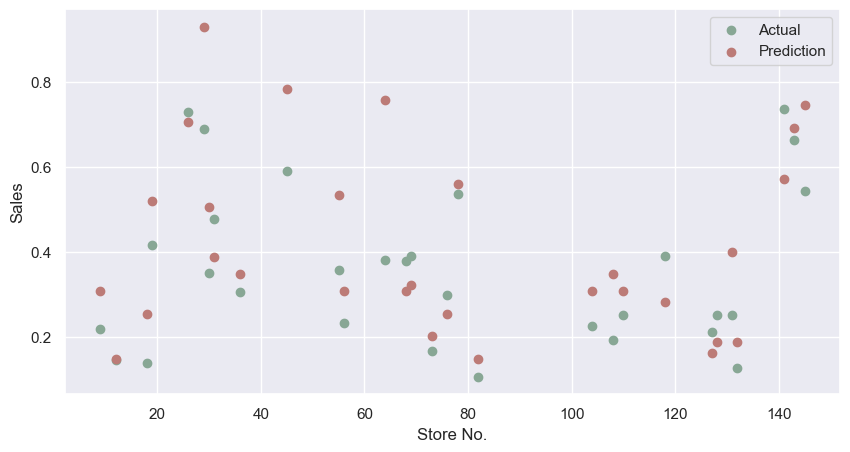

In [37]:
fig= plt.figure(figsize=(10, 5))
plt.scatter(df_staff["index"], df_staff["Actual"], color = "#88A795")
plt.scatter(df_staff["index"], df_staff["prediction"], color = "#BC7B77")
plt.xlabel("Store No.")
plt.ylabel("Sales")
plt.legend(["Actual", "Prediction"])
plt.show()

*car spaces with Sales &dollar;m*

In [38]:
x_car_train, x_car_test = X_train['Car Spaces'], X_test['Car Spaces']

x_car_train = sm.add_constant(x_car_train)
x_car_test = sm.add_constant(x_car_test)

car_resid_var = (y_train - sm.OLS(y_train, x_car_train).fit().fittedvalues)**2

car_weights = 1 / car_resid_var

model_car = sm.WLS(y_train, x_car_train, weights = car_weights).fit()

print(model_car.summary())

                            WLS Regression Results                            
Dep. Variable:               Sales $m   R-squared:                       0.997
Model:                            WLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 4.244e+04
Date:                Thu, 18 May 2023   Prob (F-statistic):          9.95e-153
Time:                        19:10:29   Log-Likelihood:                 115.88
No. Observations:                 120   AIC:                            -227.8
Df Residuals:                     118   BIC:                            -222.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1537      0.001    107.072      0.0

> ***observation:***
><ul>
	<li> R-squared: The value of 0.997 indicates that the model explains <strong> 99.7% </strong> of the variability in the sales revenue. This indicates that the model has a good fit and may be useful for predicting sales.</li>
	<li> p-values for the available parking spaces is<strong> less than 0.05</strong>, with positive coefficients indicating a <strong> positive relationship </strong> with sales. </li>
	<li> The coefficient is <strong> 0.6463 </strong> suggests that when the number ofavailable parking spaces increase the sales will increase by &dollar;646300 </li>

In [39]:
y_car_pred = model_car.predict(x_car_test)

car_mse = np.mean((y_car_pred - y_test)**2)
print("Mean squared error (MSE):", car_mse)

Mean squared error (MSE): 0.023078842246705165


> The mean square error is close to zero, it suggests that the model is performing well on average

In [40]:
df_car = pd.DataFrame({"Actual": y_test, "prediction": y_car_pred,  "error": y_test - y_car_pred})
df_car.reset_index(inplace = True)
df_car = df_car.sort_values("index")
df_car

index    Actual  prediction     error
13      9  0.218543    0.320112 -0.101569
11     12  0.145695    0.224126 -0.078431
1      18  0.139073    0.262520 -0.123448
14     19  0.417219    0.428895 -0.011677
22     26  0.728477    0.499285  0.229192
20     29  0.688742    0.385296  0.303445
29     30  0.350993    0.460890 -0.109897
5      31  0.476821    0.377703  0.099118
12     36  0.304636    0.326511 -0.021875
28     45  0.589404    0.729650 -0.140246
18     55  0.357616    0.595270 -0.237654
15     56  0.231788    0.326511 -0.094723
6      64  0.381413    0.467289 -0.085877
8      68  0.377483    0.326511  0.050973
17     69  0.390728    0.339309  0.051420
0      73  0.165563    0.243323 -0.077760
4      76  0.298013    0.268919  0.029094
3      78  0.536424    0.640063 -0.103639
9      82  0.105960    0.211328 -0.105368
16    104  0.225166    0.326511 -0.101345
26    108  0.192053    0.352107 -0.160054
10    110  0.251656    0.704053 -0.452398
2     118  0.390728    0.307314  0.083415
21    127  0.211921    0.230525 -0.018605
23    128  0.251656    0.243323  0.008332
24    131  0.251656    0.416097 -0.164442
19    132  0.125828    0.256121 -0.130294
7     141  0.735099    0.473688  0.261411
27    143  0.662252    0.588871  0.073381
25    145  0.543046    0.505684  0.037363

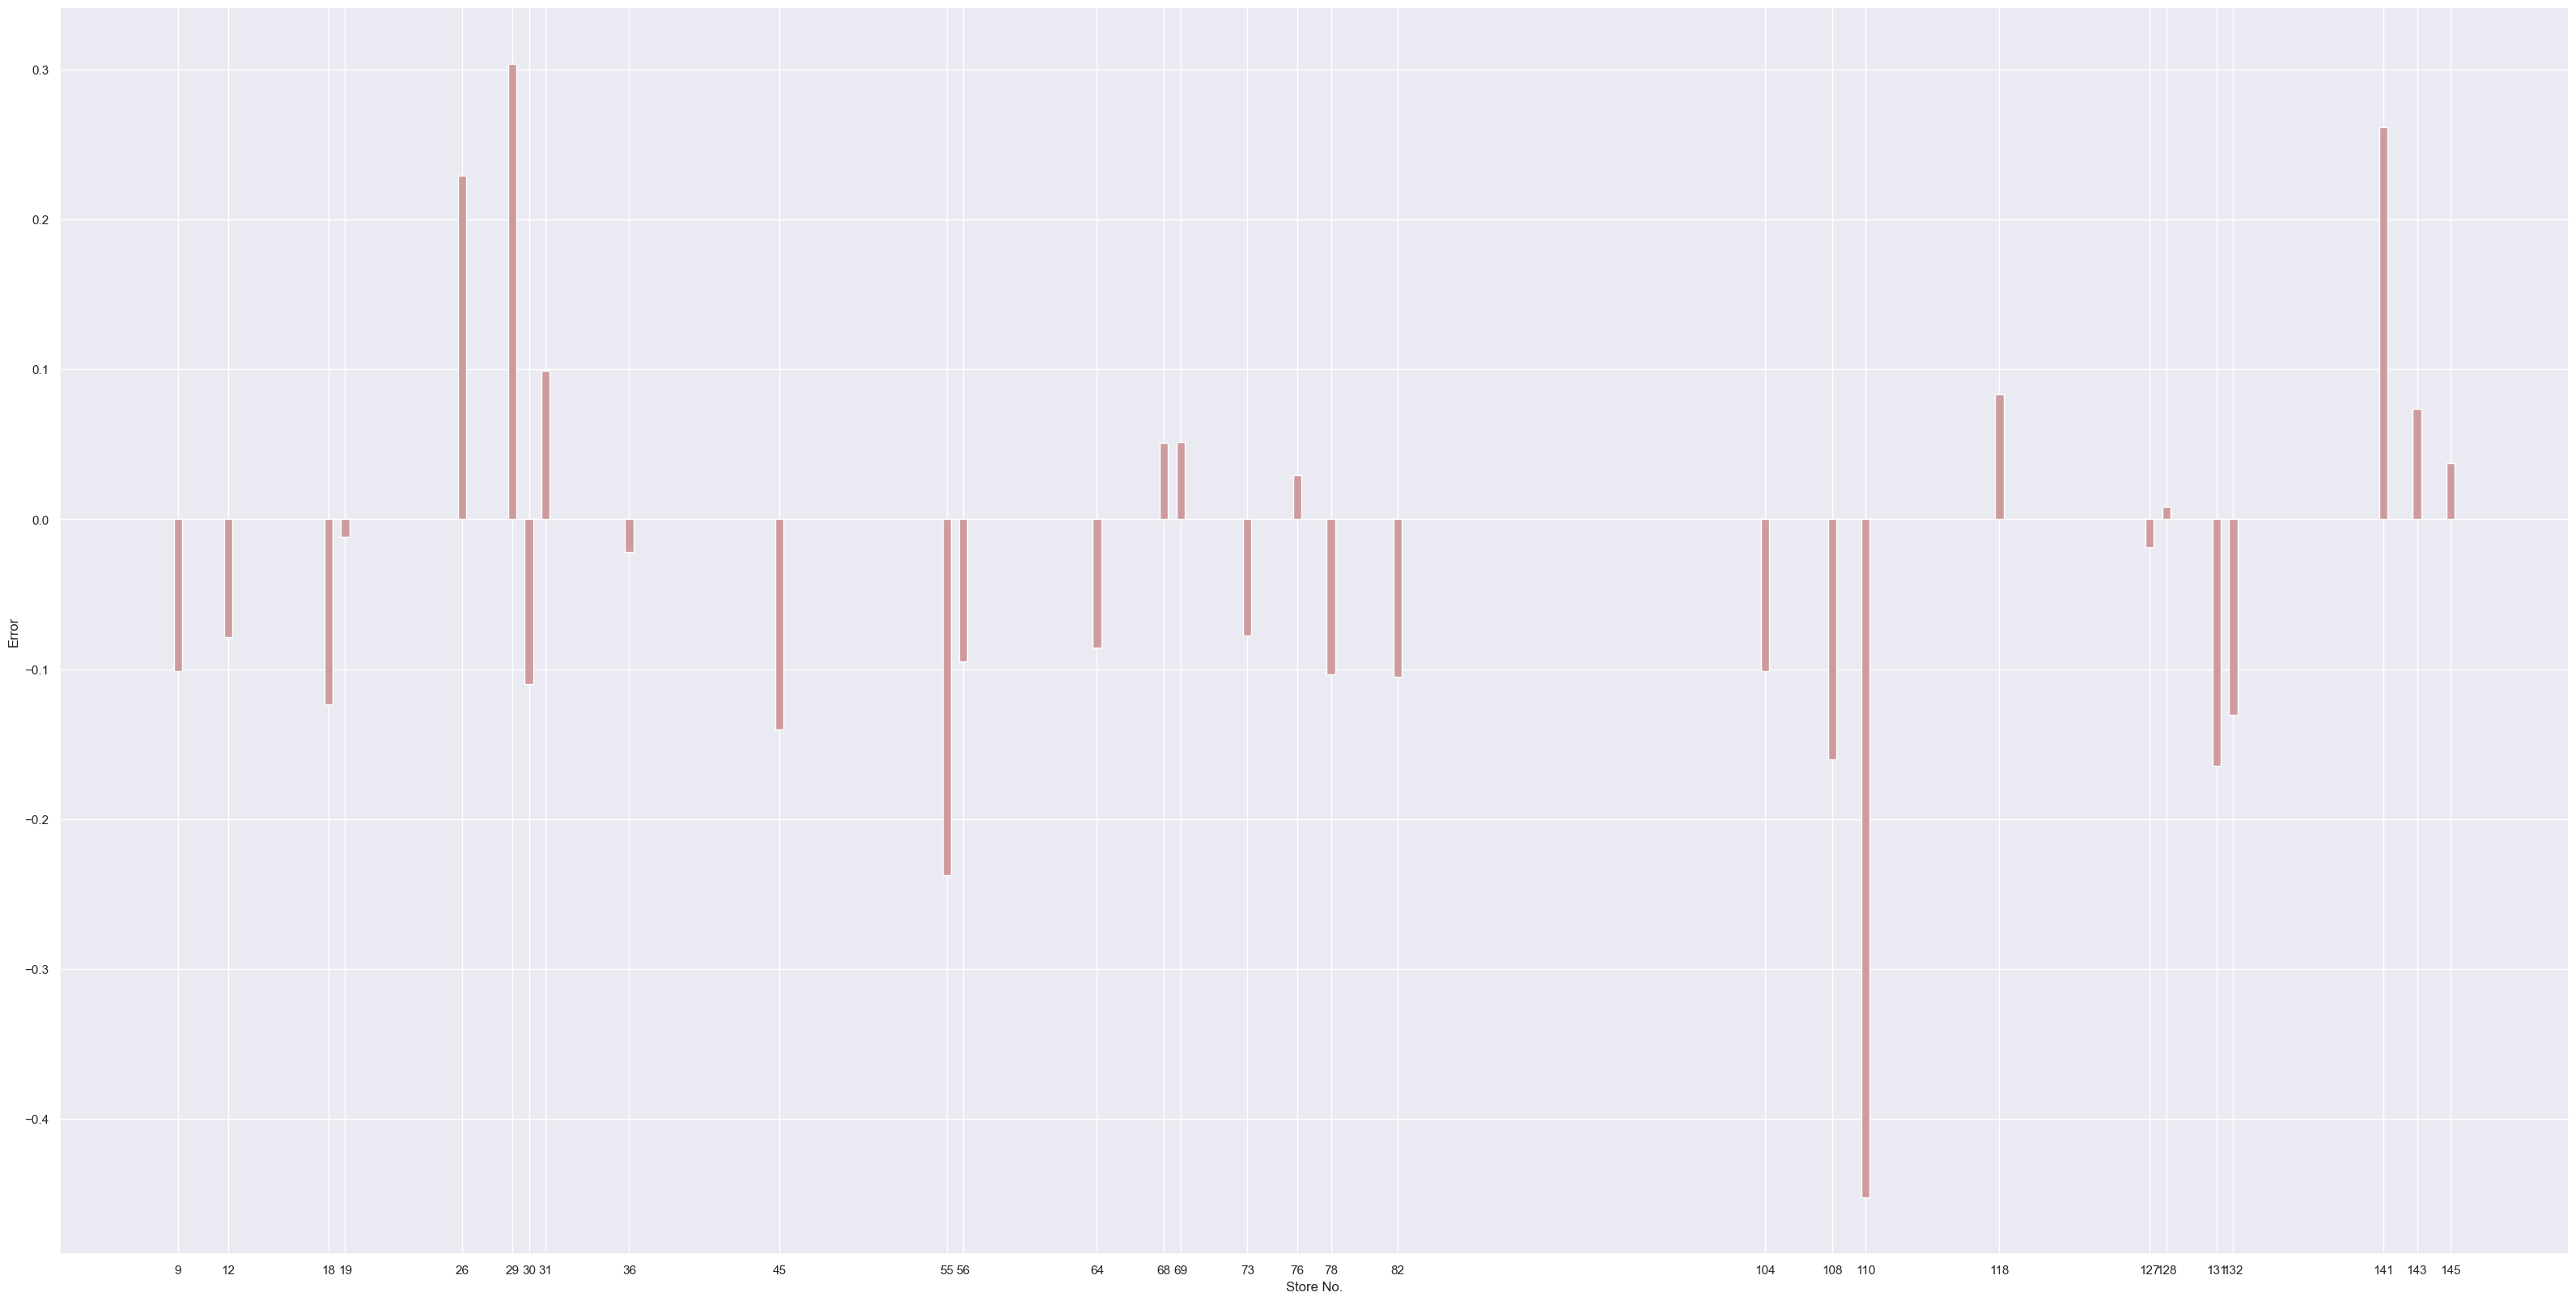

In [41]:
fig= plt.figure(figsize=(40, 20))
plt.bar("index", "error", data=df_car[:150], width=0.5, color="#CD9B9D")
plt.xlabel("Store No.")
plt.ylabel("Error")
plt.xticks(df_staff["index"])
plt.show()

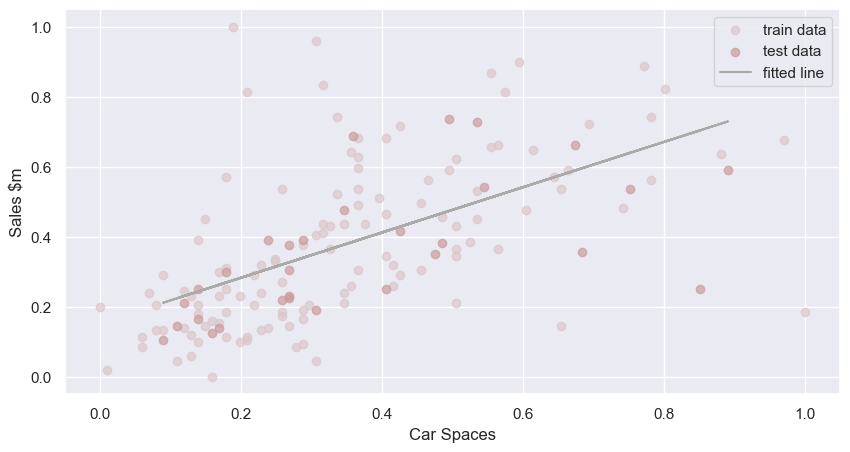

In [42]:
fig= plt.figure(figsize=(10, 5))
plt.scatter(x_car_train['Car Spaces'], y_train, edgecolor='#DBC7C9', facecolor='#DBC7C9', alpha=0.7)
plt.scatter(x_car_test['Car Spaces'], y_test, edgecolor='#CD9B9D', facecolor='#CD9B9D', alpha=0.7)
plt.plot(x_car_test['Car Spaces'], y_car_pred, color='#AAABA8')
plt.xlabel("Car Spaces")
plt.ylabel("Sales $m")
plt.legend(["train data", "test data", "fitted line"])
plt.show()

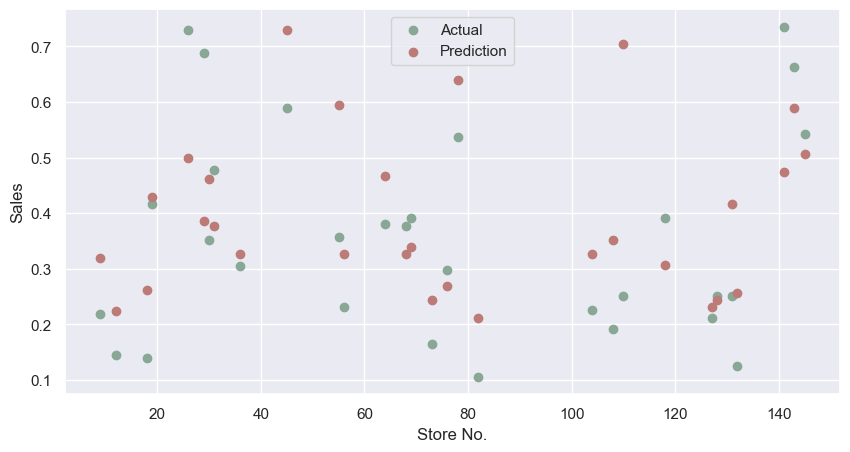

In [43]:
fig= plt.figure(figsize=(10, 5))
plt.scatter(df_car["index"], df_car["Actual"], color = "#88A795")
plt.scatter(df_car["index"], df_car["prediction"], color = "#BC7B77")
plt.xlabel("Store No.")
plt.ylabel("Sales")
plt.legend(["Actual", "Prediction"])
plt.show()

#### 2.Clustering

* Normalize the numerical features

In [44]:
pd.set_option('display.max_columns', None)
data.head()

Store No.  Sales $m  Wages $m  No. Staff Location  Loc'n (Num) State  \
0          1      12.5       2.3       60.0     Mall            2   NSW   
1          2      14.5       2.7       69.0     Mall            2   Vic   
2          3      19.0       3.1       79.0  Country            3   Vic   
3          4      18.2       2.6       66.0     Mall            2   Qld   
4          5       7.6       2.0       51.0    Strip            1   Qld   

   State (Num)  Age (Yrs)  GrossProfit  Competitors  HrsTrading  Sundays  \
0            1       10.0        0.712          3.0         110   Sun:No   
1            2        8.0        0.091          5.0         134   Sun:No   
2            2        7.0        1.075          2.0          98  Sun:Yes   
3            3        7.0        1.372          1.0          85  Sun:Yes   
4            3       15.0        2.148          0.0          72  Sun:Yes   

   Sundays (Num) Mng-Sex  Mng-Sex (Num)  Mng-Age  Mng-Exp  Mng-Train  Union%  \
0              0    Male              0     33.0     12.0        2.0    38.0   
1              0    Male              0     33.0     16.0        1.0    38.0   
2              1    Male              0     30.0      9.0        2.0    39.0   
3              1    Male              0     29.0      9.0        2.0    38.0   
4              1    Male              0     36.0      4.0        3.0    40.0   

   Car Spaces  HomeDel  HomeDel (Num)  Basket:2014  Adv.$m  
0        46.0   Del:No              0        178.0   0.171  
1        73.0   Del:No              0        178.0   0.213  
2        64.0   Del:No              0        188.0   0.255  
3        66.0  Del:Yes              1        180.0   0.287  
4        29.0   Del:No              0        171.0   0.112

In [45]:
data.shape

(150, 25)

In [46]:
new_data = data.copy()
new_data.head()

Store No.  Sales $m  Wages $m  No. Staff Location  Loc'n (Num) State  \
0          1      12.5       2.3       60.0     Mall            2   NSW   
1          2      14.5       2.7       69.0     Mall            2   Vic   
2          3      19.0       3.1       79.0  Country            3   Vic   
3          4      18.2       2.6       66.0     Mall            2   Qld   
4          5       7.6       2.0       51.0    Strip            1   Qld   

   State (Num)  Age (Yrs)  GrossProfit  Competitors  HrsTrading  Sundays  \
0            1       10.0        0.712          3.0         110   Sun:No   
1            2        8.0        0.091          5.0         134   Sun:No   
2            2        7.0        1.075          2.0          98  Sun:Yes   
3            3        7.0        1.372          1.0          85  Sun:Yes   
4            3       15.0        2.148          0.0          72  Sun:Yes   

   Sundays (Num) Mng-Sex  Mng-Sex (Num)  Mng-Age  Mng-Exp  Mng-Train  Union%  \
0              0    Male              0     33.0     12.0        2.0    38.0   
1              0    Male              0     33.0     16.0        1.0    38.0   
2              1    Male              0     30.0      9.0        2.0    39.0   
3              1    Male              0     29.0      9.0        2.0    38.0   
4              1    Male              0     36.0      4.0        3.0    40.0   

   Car Spaces  HomeDel  HomeDel (Num)  Basket:2014  Adv.$m  
0        46.0   Del:No              0        178.0   0.171  
1        73.0   Del:No              0        178.0   0.213  
2        64.0   Del:No              0        188.0   0.255  
3        66.0  Del:Yes              1        180.0   0.287  
4        29.0   Del:No              0        171.0   0.112

In [47]:
new_data.shape

(150, 25)

In [48]:
new_data.set_index("Store No.", inplace=True)

In [49]:
new_data.head()

Sales $m  Wages $m  No. Staff Location  Loc'n (Num) State  \
Store No.                                                              
1              12.5       2.3       60.0     Mall            2   NSW   
2              14.5       2.7       69.0     Mall            2   Vic   
3              19.0       3.1       79.0  Country            3   Vic   
4              18.2       2.6       66.0     Mall            2   Qld   
5               7.6       2.0       51.0    Strip            1   Qld   

           State (Num)  Age (Yrs)  GrossProfit  Competitors  HrsTrading  \
Store No.                                                                 
1                    1       10.0        0.712          3.0         110   
2                    2        8.0        0.091          5.0         134   
3                    2        7.0        1.075          2.0          98   
4                    3        7.0        1.372          1.0          85   
5                    3       15.0        2.148          0.0          72   

           Sundays  Sundays (Num) Mng-Sex  Mng-Sex (Num)  Mng-Age  Mng-Exp  \
Store No.                                                                    
1           Sun:No              0    Male              0     33.0     12.0   
2           Sun:No              0    Male              0     33.0     16.0   
3          Sun:Yes              1    Male              0     30.0      9.0   
4          Sun:Yes              1    Male              0     29.0      9.0   
5          Sun:Yes              1    Male              0     36.0      4.0   

           Mng-Train  Union%  Car Spaces  HomeDel  HomeDel (Num)  Basket:2014  \
Store No.                                                                       
1                2.0    38.0        46.0   Del:No              0        178.0   
2                1.0    38.0        73.0   Del:No              0        178.0   
3                2.0    39.0        64.0   Del:No              0        188.0   
4                2.0    38.0        66.0  Del:Yes              1        180.0   
5                3.0    40.0        29.0   Del:No              0        171.0   

           Adv.$m  
Store No.          
1           0.171  
2           0.213  
3           0.255  
4           0.287  
5           0.112

In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [51]:
numerical_features = ['Sales $m','Wages $m','No. Staff','Age (Yrs)','GrossProfit','Adv.$m','Competitors','HrsTrading','Mng-Age','Mng-Exp','Mng-Train','Union%','Car Spaces','Basket:2014']
scaler = StandardScaler()
new_data[numerical_features] = scaler.fit_transform(new_data[numerical_features])

*Apply dummy encoding to transform the categorical features*

In [52]:
new_data.head()

Sales $m  Wages $m  No. Staff Location  Loc'n (Num) State  \
Store No.                                                              
1          0.268550 -0.135461  -0.081233     Mall            2   NSW   
2          0.852606  0.571290   0.569621     Mall            2   Vic   
3          2.166731  1.278041   1.292792  Country            3   Vic   
4          1.933109  0.394603   0.352670     Mall            2   Qld   
5         -1.162387 -0.665524  -0.732087    Strip            1   Qld   

           State (Num)  Age (Yrs)  GrossProfit  Competitors  HrsTrading  \
Store No.                                                                 
1                    1   0.212623    -0.462921     0.283727    0.154536   
2                    2  -0.156087    -1.427750     1.433971    1.171593   
3                    2  -0.340443     0.101061    -0.291395   -0.353992   
4                    3  -0.340443     0.562501    -0.866518   -0.904898   
5                    3   1.134399     1.768148    -1.441640   -1.455804   

           Sundays  Sundays (Num) Mng-Sex  Mng-Sex (Num)   Mng-Age   Mng-Exp  \
Store No.                                                                      
1           Sun:No              0    Male              0 -0.744754  0.691528   
2           Sun:No              0    Male              0 -0.744754  1.698608   
3          Sun:Yes              1    Male              0 -1.168756 -0.063782   
4          Sun:Yes              1    Male              0 -1.310090 -0.063782   
5          Sun:Yes              1    Male              0 -0.320753 -1.322632   

           Mng-Train    Union%  Car Spaces  HomeDel  HomeDel (Num)  \
Store No.                                                            
1          -0.689409  0.043685    0.106806   Del:No              0   
2          -1.537042  0.043685    1.372304   Del:No              0   
3          -0.689409  0.248460    0.950471   Del:No              0   
4          -0.689409  0.043685    1.044212  Del:Yes              1   
5           0.158225  0.453234   -0.689989   Del:No              0   

           Basket:2014    Adv.$m  
Store No.                         
1            -0.098354  0.386059  
2            -0.098354  1.029367  
3             1.063313  1.672675  
4             0.133979  2.162815  
5            -0.911521 -0.517636

In [53]:
new_data.drop(["Loc'n (Num)","State (Num)",'Sundays','Mng-Sex','HomeDel'] , axis=1 , inplace = True)

In [54]:
new_data.head()

Sales $m  Wages $m  No. Staff Location State  Age (Yrs)  \
Store No.                                                            
1          0.268550 -0.135461  -0.081233     Mall   NSW   0.212623   
2          0.852606  0.571290   0.569621     Mall   Vic  -0.156087   
3          2.166731  1.278041   1.292792  Country   Vic  -0.340443   
4          1.933109  0.394603   0.352670     Mall   Qld  -0.340443   
5         -1.162387 -0.665524  -0.732087    Strip   Qld   1.134399   

           GrossProfit  Competitors  HrsTrading  Sundays (Num)  Mng-Sex (Num)  \
Store No.                                                                       
1            -0.462921     0.283727    0.154536              0              0   
2            -1.427750     1.433971    1.171593              0              0   
3             0.101061    -0.291395   -0.353992              1              0   
4             0.562501    -0.866518   -0.904898              1              0   
5             1.768148    -1.441640   -1.455804              1              0   

            Mng-Age   Mng-Exp  Mng-Train    Union%  Car Spaces  HomeDel (Num)  \
Store No.                                                                       
1         -0.744754  0.691528  -0.689409  0.043685    0.106806              0   
2         -0.744754  1.698608  -1.537042  0.043685    1.372304              0   
3         -1.168756 -0.063782  -0.689409  0.248460    0.950471              0   
4         -1.310090 -0.063782  -0.689409  0.043685    1.044212              1   
5         -0.320753 -1.322632   0.158225  0.453234   -0.689989              0   

           Basket:2014    Adv.$m  
Store No.                         
1            -0.098354  0.386059  
2            -0.098354  1.029367  
3             1.063313  1.672675  
4             0.133979  2.162815  
5            -0.911521 -0.517636

In [55]:
location_dummies = pd.get_dummies(new_data["Location"], prefix='Location')
state_dummies = pd.get_dummies(new_data["State"], prefix='State')

In [56]:
new_data = pd.concat([new_data, location_dummies, state_dummies], axis=1)

In [57]:
pd.set_option('display.max_columns', None)
new_data.head()

Sales $m  Wages $m  No. Staff Location State  Age (Yrs)  \
Store No.                                                            
1          0.268550 -0.135461  -0.081233     Mall   NSW   0.212623   
2          0.852606  0.571290   0.569621     Mall   Vic  -0.156087   
3          2.166731  1.278041   1.292792  Country   Vic  -0.340443   
4          1.933109  0.394603   0.352670     Mall   Qld  -0.340443   
5         -1.162387 -0.665524  -0.732087    Strip   Qld   1.134399   

           GrossProfit  Competitors  HrsTrading  Sundays (Num)  Mng-Sex (Num)  \
Store No.                                                                       
1            -0.462921     0.283727    0.154536              0              0   
2            -1.427750     1.433971    1.171593              0              0   
3             0.101061    -0.291395   -0.353992              1              0   
4             0.562501    -0.866518   -0.904898              1              0   
5             1.768148    -1.441640   -1.455804              1              0   

            Mng-Age   Mng-Exp  Mng-Train    Union%  Car Spaces  HomeDel (Num)  \
Store No.                                                                       
1         -0.744754  0.691528  -0.689409  0.043685    0.106806              0   
2         -0.744754  1.698608  -1.537042  0.043685    1.372304              0   
3         -1.168756 -0.063782  -0.689409  0.248460    0.950471              0   
4         -1.310090 -0.063782  -0.689409  0.043685    1.044212              1   
5         -0.320753 -1.322632   0.158225  0.453234   -0.689989              0   

           Basket:2014    Adv.$m  Location_Country  Location_Mall  \
Store No.                                                           
1            -0.098354  0.386059                 0              1   
2            -0.098354  1.029367                 0              1   
3             1.063313  1.672675                 1              0   
4             0.133979  2.162815                 0              1   
5            -0.911521 -0.517636                 0              0   

           Location_Strip  State_ACT  State_NSW  State_NT  State_Qld  \
Store No.                                                              
1                       0          0          1         0          0   
2                       0          0          0         0          0   
3                       0          0          0         0          0   
4                       0          0          0         0          1   
5                       1          0          0         0          1   

           State_SA  State_Tas  State_Vic  State_WA  
Store No.                                            
1                 0          0          0         0  
2                 0          0          1         0  
3                 0          0          1         0  
4                 0          0          0         0  
5                 0          0          0         0

In [58]:
new_data.drop(['Location',"State"] , axis=1 , inplace = True)

In [59]:
new_data.head()

Sales $m  Wages $m  No. Staff  Age (Yrs)  GrossProfit  Competitors  \
Store No.                                                                       
1          0.268550 -0.135461  -0.081233   0.212623    -0.462921     0.283727   
2          0.852606  0.571290   0.569621  -0.156087    -1.427750     1.433971   
3          2.166731  1.278041   1.292792  -0.340443     0.101061    -0.291395   
4          1.933109  0.394603   0.352670  -0.340443     0.562501    -0.866518   
5         -1.162387 -0.665524  -0.732087   1.134399     1.768148    -1.441640   

           HrsTrading  Sundays (Num)  Mng-Sex (Num)   Mng-Age   Mng-Exp  \
Store No.                                                                 
1            0.154536              0              0 -0.744754  0.691528   
2            1.171593              0              0 -0.744754  1.698608   
3           -0.353992              1              0 -1.168756 -0.063782   
4           -0.904898              1              0 -1.310090 -0.063782   
5           -1.455804              1              0 -0.320753 -1.322632   

           Mng-Train    Union%  Car Spaces  HomeDel (Num)  Basket:2014  \
Store No.                                                                
1          -0.689409  0.043685    0.106806              0    -0.098354   
2          -1.537042  0.043685    1.372304              0    -0.098354   
3          -0.689409  0.248460    0.950471              0     1.063313   
4          -0.689409  0.043685    1.044212              1     0.133979   
5           0.158225  0.453234   -0.689989              0    -0.911521   

             Adv.$m  Location_Country  Location_Mall  Location_Strip  \
Store No.                                                              
1          0.386059                 0              1               0   
2          1.029367                 0              1               0   
3          1.672675                 1              0               0   
4          2.162815                 0              1               0   
5         -0.517636                 0              0               1   

           State_ACT  State_NSW  State_NT  State_Qld  State_SA  State_Tas  \
Store No.                                                                   
1                  0          1         0          0         0          0   
2                  0          0         0          0         0          0   
3                  0          0         0          0         0          0   
4                  0          0         0          1         0          0   
5                  0          0         0          1         0          0   

           State_Vic  State_WA  
Store No.                       
1                  0         0  
2                  1         0  
3                  1         0  
4                  0         0  
5                  0         0

In [60]:
new_data.shape

(150, 28)

> All numerical features are scaled by standard scaler , and all categorical features are transformed to one hot encode

* Apply elbow method to determine the optimal number of clusters

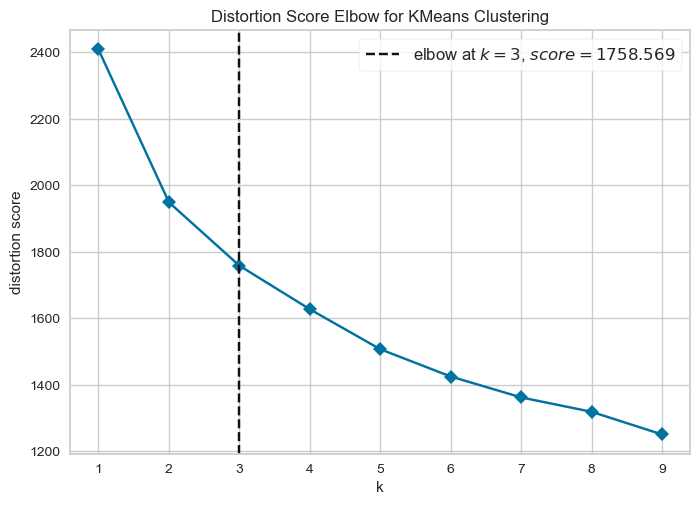

In [61]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings = False)
visualizer.fit(new_data)
visualizer.show();

* Apply PCA algorithm to reduce the features and make clear clusters

In [62]:
new_data.shape

(150, 28)

In [63]:
new_data.columns

Index(['Sales $m', 'Wages $m', 'No. Staff', 'Age (Yrs)', 'GrossProfit',
       'Competitors', 'HrsTrading', 'Sundays (Num)', 'Mng-Sex (Num)',
       'Mng-Age', 'Mng-Exp', 'Mng-Train', 'Union%', 'Car Spaces',
       'HomeDel (Num)', 'Basket:2014', 'Adv.$m', 'Location_Country',
       'Location_Mall', 'Location_Strip', 'State_ACT', 'State_NSW', 'State_NT',
       'State_Qld', 'State_SA', 'State_Tas', 'State_Vic', 'State_WA'],
      dtype='object')

In [64]:
from sklearn.decomposition import PCA

In [65]:
pca = PCA()
pca_data = pca.fit_transform(new_data)

* Apply K-mean algorithm and scatter the clusters based on the PCA

In [66]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(pca_data)
unique_labels = np.unique(label)

In [67]:
clusters = kmeans.predict(pca_data)
clusters

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 2, 1,
       2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 0, 2, 0, 1, 1, 2,
       1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 1,
       1, 1, 2, 0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 2, 0,
       2, 1, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       0, 0, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 0,
       0, 1, 0, 2, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 2, 2])

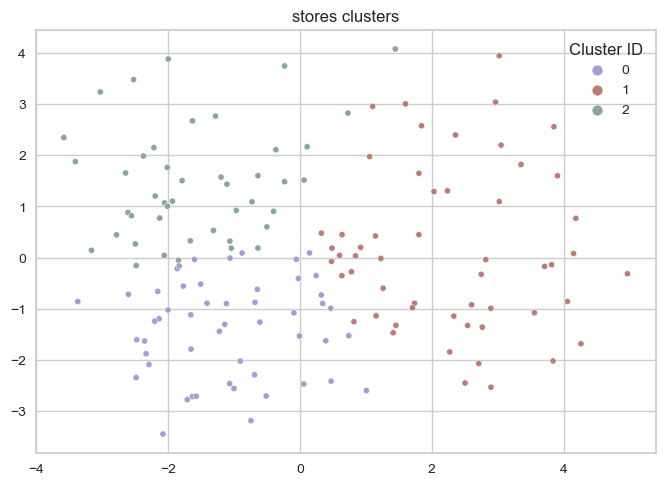

In [68]:
my_palette = ['#A59CD3', '#BC7B77', '#88A795']

sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=label, palette=my_palette, s=20)

plt.title('stores clusters')
plt.legend(title='Cluster ID')

plt.show()

In [69]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score_value = calinski_harabasz_score(pca_data, label)
print("Calinski-Harabasz Index:", calinski_harabasz_score_value)

Calinski-Harabasz Index: 26.84281053989787


*Assign the records to its cluster in the original data*

In [70]:
new_data['cluster'] = clusters
new_data.head(10)

Sales $m  Wages $m  No. Staff  Age (Yrs)  GrossProfit  Competitors  \
Store No.                                                                       
1          0.268550 -0.135461  -0.081233   0.212623    -0.462921     0.283727   
2          0.852606  0.571290   0.569621  -0.156087    -1.427750     1.433971   
3          2.166731  1.278041   1.292792  -0.340443     0.101061    -0.291395   
4          1.933109  0.394603   0.352670  -0.340443     0.562501    -0.866518   
5         -1.162387 -0.665524  -0.732087   1.134399     1.768148    -1.441640   
6          2.020717  0.571290   0.063401  -0.524798     1.567725    -1.441640   
7          0.443767  0.041227  -0.008916  -0.340443    -0.540604    -0.291395   
8          0.969417  0.217915  -0.153550  -0.524798    -0.481565    -0.291395   
9          1.611878  0.571290   0.280353  -0.156087    -0.113345     0.283727   
10        -0.695142 -0.488836  -0.442819   1.318754    -1.468145     1.433971   

           HrsTrading  Sundays (Num)  Mng-Sex (Num)   Mng-Age   Mng-Exp  \
Store No.                                                                 
1            0.154536              0              0 -0.744754  0.691528   
2            1.171593              0              0 -0.744754  1.698608   
3           -0.353992              1              0 -1.168756 -0.063782   
4           -0.904898              1              0 -1.310090 -0.063782   
5           -1.455804              1              0 -0.320753 -1.322632   
6           -1.243917              1              0 -0.886088  1.446838   
7           -0.269238              1              0  1.940590  1.446838   
8           -0.481124              0              0  0.385917 -1.322632   
9            0.239291              0              0 -1.027422  0.691528   
10           1.213971              1              1  0.527251  0.943298   

           Mng-Train    Union%  Car Spaces  HomeDel (Num)  Basket:2014  \
Store No.                                                                
1          -0.689409  0.043685    0.106806              0    -0.098354   
2          -1.537042  0.043685    1.372304              0    -0.098354   
3          -0.689409  0.248460    0.950471              0     1.063313   
4          -0.689409  0.043685    1.044212              1     0.133979   
5           0.158225  0.453234   -0.689989              0    -0.911521   
6           1.005858 -0.161089   -0.174416              1     1.527979   
7           0.158225 -0.161089    1.184823              0     1.411813   
8           0.158225 -0.365864    0.059936              1     0.250146   
9           1.853492  0.453234   -0.080675              0     1.411813   
10         -0.689409  1.067557   -0.455638              0    -1.608522   

             Adv.$m  Location_Country  Location_Mall  Location_Strip  \
Store No.                                                              
1          0.386059                 0              1               0   
2          1.029367                 0              1               0   
3          1.672675                 1              0               0   
4          2.162815                 0              1               0   
5         -0.517636                 0              0               1   
6          1.412289                 1              0               0   
7         -0.333833                 1              0               0   
8          1.044684                 0              1               0   
9          1.060001                 1              0               0   
10         0.125672                 0              0               1   

           State_ACT  State_NSW  State_NT  State_Qld  State_SA  State_Tas  \
Store No.                                                                   
1                  0          1         0          0         0          0   
2                  0          0         0          0         0          0   
3                  0          0         0          0         0          0  

In [71]:
data_with_clusters = data.copy()
data_with_clusters.set_index("Store No.", inplace=True)
data_with_clusters.head()

Sales $m  Wages $m  No. Staff Location  Loc'n (Num) State  \
Store No.                                                              
1              12.5       2.3       60.0     Mall            2   NSW   
2              14.5       2.7       69.0     Mall            2   Vic   
3              19.0       3.1       79.0  Country            3   Vic   
4              18.2       2.6       66.0     Mall            2   Qld   
5               7.6       2.0       51.0    Strip            1   Qld   

           State (Num)  Age (Yrs)  GrossProfit  Competitors  HrsTrading  \
Store No.                                                                 
1                    1       10.0        0.712          3.0         110   
2                    2        8.0        0.091          5.0         134   
3                    2        7.0        1.075          2.0          98   
4                    3        7.0        1.372          1.0          85   
5                    3       15.0        2.148          0.0          72   

           Sundays  Sundays (Num) Mng-Sex  Mng-Sex (Num)  Mng-Age  Mng-Exp  \
Store No.                                                                    
1           Sun:No              0    Male              0     33.0     12.0   
2           Sun:No              0    Male              0     33.0     16.0   
3          Sun:Yes              1    Male              0     30.0      9.0   
4          Sun:Yes              1    Male              0     29.0      9.0   
5          Sun:Yes              1    Male              0     36.0      4.0   

           Mng-Train  Union%  Car Spaces  HomeDel  HomeDel (Num)  Basket:2014  \
Store No.                                                                       
1                2.0    38.0        46.0   Del:No              0        178.0   
2                1.0    38.0        73.0   Del:No              0        178.0   
3                2.0    39.0        64.0   Del:No              0        188.0   
4                2.0    38.0        66.0  Del:Yes              1        180.0   
5                3.0    40.0        29.0   Del:No              0        171.0   

           Adv.$m  
Store No.          
1           0.171  
2           0.213  
3           0.255  
4           0.287  
5           0.112

In [72]:
data_with_clusters = pd.concat([data_with_clusters, new_data['cluster']], axis=1)
data_with_clusters.head(10)

Sales $m  Wages $m  No. Staff Location  Loc'n (Num) State  \
Store No.                                                              
1              12.5       2.3       60.0     Mall            2   NSW   
2              14.5       2.7       69.0     Mall            2   Vic   
3              19.0       3.1       79.0  Country            3   Vic   
4              18.2       2.6       66.0     Mall            2   Qld   
5               7.6       2.0       51.0    Strip            1   Qld   
6              18.5       2.7       62.0  Country            3   Vic   
7              13.1       2.4       61.0  Country            3   NSW   
8              14.9       2.5       59.0     Mall            2   NSW   
9              17.1       2.7       65.0  Country            3    WA   
10              9.2       2.1       55.0    Strip            1   Vic   

           State (Num)  Age (Yrs)  GrossProfit  Competitors  HrsTrading  \
Store No.                                                                 
1                    1       10.0        0.712          3.0         110   
2                    2        8.0        0.091          5.0         134   
3                    2        7.0        1.075          2.0          98   
4                    3        7.0        1.372          1.0          85   
5                    3       15.0        2.148          0.0          72   
6                    2        6.0        2.019          0.0          77   
7                    1        7.0        0.662          2.0         100   
8                    1        6.0        0.700          2.0          95   
9                    5        8.0        0.937          3.0         112   
10                   2       16.0        0.065          5.0         135   

           Sundays  Sundays (Num) Mng-Sex  Mng-Sex (Num)  Mng-Age  Mng-Exp  \
Store No.                                                                    
1           Sun:No              0    Male              0     33.0     12.0   
2           Sun:No              0    Male              0     33.0     16.0   
3          Sun:Yes              1    Male              0     30.0      9.0   
4          Sun:Yes              1    Male              0     29.0      9.0   
5          Sun:Yes              1    Male              0     36.0      4.0   
6          Sun:Yes              1    Male              0     32.0     15.0   
7          Sun:Yes              1    Male              0     52.0     15.0   
8           Sun:No              0    Male              0     41.0      4.0   
9           Sun:No              0    Male              0     31.0     12.0   
10         Sun:Yes              1  Female              1     42.0     13.0   

           Mng-Train  Union%  Car Spaces  HomeDel  HomeDel (Num)  Basket:2014  \
Store No.                                                                       
1                2.0    38.0        46.0   Del:No              0        178.0   
2                1.0    38.0        73.0   Del:No              0        178.0   
3                2.0    39.0        64.0   Del:No              0        188.0   
4                2.0    38.0        66.0  Del:Yes              1        180.0   
5                3.0    40.0        29.0   Del:No              0        171.0   
6                4.0    37.0        40.0  Del:Yes              1        192.0   
7                3.0    37.0        69.0   Del:No              0        191.0   
8                3.0    36.0        45.0  Del:Yes              1        181.0   
9                5.0    40.0        42.0   Del:No              0        191.0   
10               2.0    43.0        34.0   Del:No              0        165.0   

           Adv.$m  cluster  
Store No.                   
1           0.171        1  
2           0.213        1  
3           0.255        1  
4           0.287        1  
5           0.112        0  
6           0.238        1  
7           0.124        1  
8           0.214        1  
9           0.215        1  
10          0.15

* Exploratory Analysis to the clusters

*Display summary statistics of numerical features of each cluster*

In [73]:
data_with_clusters['cluster'].value_counts()

1    55
0    51
2    44
Name: cluster, dtype: int64

In [74]:
data_with_clusters[data_with_clusters['cluster'] == 0].describe()

Sales $m   Wages $m  No. Staff  Loc'n (Num)  State (Num)  Age (Yrs)  \
count  51.000000  51.000000  51.000000    51.000000    51.000000  51.000000   
mean    9.607843   2.023529  52.019608     1.941176     2.764706   8.843137   
std     1.782901   0.278272   7.270461     0.675626     1.582255   5.689895   
min     6.200000   1.500000  35.000000     1.000000     1.000000   1.000000   
25%     8.100000   1.800000  46.000000     1.500000     2.000000   4.000000   
50%     9.500000   1.900000  53.000000     2.000000     2.000000   9.000000   
75%    10.550000   2.150000  56.000000     2.000000     3.500000  12.000000   
max    14.500000   2.900000  67.000000     3.000000     8.000000  24.000000   

       GrossProfit  Competitors  HrsTrading  Sundays (Num)  Mng-Sex (Num)  \
count    51.000000    51.000000   51.000000      51.000000      51.000000   
mean      1.382000     1.529412   93.196078       0.588235       0.117647   
std       0.582023     1.007034   13.231810       0.497050       0.325396   
min       0.196000     0.000000   72.000000       0.000000       0.000000   
25%       1.009000     1.000000   85.000000       0.000000       0.000000   
50%       1.315000     1.000000   96.000000       1.000000       0.000000   
75%       1.549500     2.000000  101.000000       1.000000       0.000000   
max       2.872000     4.000000  118.000000       1.000000       1.000000   

         Mng-Age    Mng-Exp  Mng-Train     Union%  Car Spaces  HomeDel (Num)  \
count  51.000000  51.000000  51.000000  51.000000   51.000000      51.000000   
mean   36.666667   7.960784   2.745098  37.627451   32.411765       0.431373   
std     6.156839   3.783970   1.092577   5.253421   17.886505       0.500196   
min    27.000000   1.000000   1.000000  24.000000    9.000000       0.000000   
25%    33.000000   6.000000   2.000000  35.000000   21.500000       0.000000   
50%    36.000000   8.000000   3.000000  38.000000   26.000000       0.000000   
75%    39.000000  10.000000   3.000000  41.000000   39.000000       1.000000   
max    53.000000  19.000000   6.000000  49.000000  109.000000       1.000000   

       Basket:2014     Adv.$m  cluster  
count    51.000000  51.000000     51.0  
mean    180.450980   0.100784      0.0  
std       7.668934   0.039530      0.0  
min     167.000000   0.031000      0.0  
25%     174.500000   0.069000      0.0  
50%     181.000000   0.103000      0.0  
75%     184.000000   0.122000      0.0  
max     204.000000   0.212000      0.0

In [75]:
data_with_clusters[data_with_clusters['cluster'] == 1].describe()

Sales $m   Wages $m   No. Staff  Loc'n (Num)  State (Num)  Age (Yrs)  \
count  55.000000  55.000000   55.000000    55.000000    55.000000  55.000000   
mean   15.137442   2.930909   74.218182     2.218182     3.181818   8.272727   
std     2.494331   0.445085   11.737390     0.762329     2.000842   4.373551   
min     9.100000   2.100000   56.000000     1.000000     1.000000   1.000000   
25%    13.350000   2.600000   66.000000     2.000000     1.000000   5.500000   
50%    14.800000   2.900000   72.000000     2.000000     3.000000   7.000000   
75%    16.750000   3.300000   83.500000     3.000000     4.500000   9.500000   
max    21.000000   3.900000  102.000000     3.000000     8.000000  22.000000   

       GrossProfit  Competitors  HrsTrading  Sundays (Num)  Mng-Sex (Num)  \
count    55.000000    55.000000   55.000000      55.000000      55.000000   
mean      1.054509     2.109091  101.145455       0.654545       0.127273   
std       0.620782     1.696104   22.350257       0.479899       0.336350   
min       0.075000     0.000000   72.000000       0.000000       0.000000   
25%       0.649500     1.000000   85.000000       0.000000       0.000000   
50%       1.000000     2.000000   98.000000       1.000000       0.000000   
75%       1.438500     3.000000  112.000000       1.000000       0.000000   
max       2.352000     6.000000  168.000000       1.000000       1.000000   

         Mng-Age    Mng-Exp  Mng-Train     Union%  Car Spaces  HomeDel (Num)  \
count  55.000000  55.000000  55.000000  55.000000   55.000000      55.000000   
mean   36.309091  10.381818   2.545455  37.872727   61.021576       0.236364   
std     6.064080   4.043701   1.214392   3.854072   18.069138       0.428764   
min    28.000000   2.000000   1.000000  24.000000   27.000000       0.000000   
25%    31.000000   8.000000   2.000000  36.000000   45.000000       0.000000   
50%    35.000000  10.000000   2.000000  38.000000   59.000000       0.000000   
75%    40.500000  13.000000   3.000000  40.000000   73.500000       0.000000   
max    52.000000  21.000000   5.000000  50.000000  106.000000       1.000000   

       Basket:2014     Adv.$m  cluster  
count    55.000000  55.000000     55.0  
mean    182.581818   0.207787      1.0  
std       7.899111   0.051407      0.0  
min     166.000000   0.116000      1.0  
25%     176.500000   0.173000      1.0  
50%     184.000000   0.201000      1.0  
75%     189.500000   0.235000      1.0  
max     194.000000   0.348000      1.0

In [76]:
data_with_clusters[data_with_clusters['cluster'] == 2].describe()

Sales $m   Wages $m  No. Staff  Loc'n (Num)  State (Num)  Age (Yrs)  \
count  44.000000  44.000000  44.000000    44.000000    44.000000  44.000000   
mean    9.420455   2.093182  55.306667     1.500000     3.159091   9.568182   
std     1.955265   0.394378   8.961189     0.698836     2.090323   6.326018   
min     5.900000   1.600000  39.000000     1.000000     1.000000   2.000000   
25%     8.075000   1.875000  50.750000     1.000000     1.000000   3.750000   
50%     9.050000   2.000000  55.000000     1.000000     3.000000   8.500000   
75%    11.025000   2.225000  60.000000     2.000000     4.000000  15.000000   
max    15.300000   3.400000  82.000000     3.000000     8.000000  23.000000   

       GrossProfit  Competitors  HrsTrading  Sundays (Num)  Mng-Sex (Num)  \
count    44.000000    44.000000   44.000000      44.000000      44.000000   
mean      0.523023     4.136364  128.113636       0.613636       0.272727   
std       0.397429     1.304570   19.673162       0.492545       0.450511   
min       0.018000     2.000000   96.000000       0.000000       0.000000   
25%       0.165000     3.000000  111.750000       0.000000       0.000000   
50%       0.488000     4.000000  125.500000       1.000000       0.000000   
75%       0.822750     5.000000  139.250000       1.000000       1.000000   
max       1.545000     7.000000  168.000000       1.000000       1.000000   

         Mng-Age    Mng-Exp  Mng-Train     Union%  Car Spaces  HomeDel (Num)  \
count  44.000000  44.000000  44.000000  44.000000   44.000000      44.000000   
mean   42.577727   9.340909   3.227273  37.863636   35.204545       0.227273   
std     7.577707   3.772256   1.158661   5.692063   14.040770       0.423915   
min    28.000000   1.000000   1.000000  27.000000    8.000000       0.000000   
25%    37.750000   7.000000   2.000000  33.000000   25.750000       0.000000   
50%    42.000000   9.000000   3.000000  39.500000   34.500000       0.000000   
75%    46.000000  12.000000   4.000000  41.250000   40.000000       0.000000   
max    60.000000  20.000000   6.000000  49.000000   74.000000       1.000000   

       Basket:2014     Adv.$m  cluster  
count    44.000000  44.000000     44.0  
mean    172.318182   0.120477      2.0  
std       6.873518   0.041942      0.0  
min     162.000000   0.020000      2.0  
25%     168.000000   0.099000      2.0  
50%     170.000000   0.116500      2.0  
75%     175.250000   0.140250      2.0  
max     189.000000   0.253000      2.0

*Visaulize the numerical features with the clusters*

In [77]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

color_palette = ["#AAABA8","#BC7B77","#CD9B9D","#DBC7C9","#88A795","#A59CD3"]
grouped_data = data_with_clusters.groupby('cluster')

fig1 = go.Figure()
fig1.add_trace(go.Bar(x=grouped_data['Sales $m'].mean().index,
                      y=grouped_data['Sales $m'].mean(),
                      hovertext=grouped_data['Sales $m'].sum().round(2),
                      name='Average Sales $m',
                      marker_color=color_palette))
fig1.update_layout(title='Average Sales $m by Cluster')

fig2 = go.Figure()
fig2.add_trace(go.Bar(x=grouped_data['Wages $m'].mean().index,
                      y=grouped_data['Wages $m'].mean(),
                      hovertext=grouped_data['Sales $m'].sum().round(2),
                      name='Average Wages $m',
                      marker_color=color_palette))
fig2.update_layout(title='Average Wages $m by Cluster')

fig3 = go.Figure()
fig3.add_trace(go.Bar(x=grouped_data['No. Staff'].mean().index,
                      y=grouped_data['No. Staff'].mean(),
                      hovertext=grouped_data['No. Staff'].sum().round(2),
                      name='Average No. Staff',
                      marker_color=color_palette))
fig3.update_layout(title='Average effective staff by Cluster')

fig4 = go.Figure()
fig4.add_trace(go.Bar(x=grouped_data['GrossProfit'].mean().index,
                      y=grouped_data['GrossProfit'].mean(),
                      hovertext=grouped_data['GrossProfit'].sum().round(2),
                      name='Average GrossProfit $m',
                      marker_color=color_palette))
fig4.update_layout(title='Average GrossProfit $m by Cluster')

fig5 = go.Figure()
fig5.add_trace(go.Bar(x=grouped_data['Adv.$m'].mean().index,
                      y=grouped_data['Adv.$m'].mean(),
                      hovertext=grouped_data['Sales $m'].mean().round(2),
                      name='Average Advertising $m',
                      marker_color=color_palette))
fig5.update_layout(title='Average Advertising $m by Cluster')

fig6 = go.Figure()
fig6.add_trace(go.Bar(x=grouped_data['Competitors'].mean().index,
                      y=grouped_data['Competitors'].mean(),
                      hovertext=grouped_data['GrossProfit'].mean().round(2),
                      name='Average Competitors',
                      marker_color=color_palette))
fig6.update_layout(title='Average Competitors for each Cluster')

fig7 = go.Figure()
fig7.add_trace(go.Bar(x=grouped_data['HrsTrading'].mean().index,
                      y=grouped_data['HrsTrading'].mean(),
                      hovertext=grouped_data['GrossProfit'].mean().round(2),
                      name='Average Trading hours',
                      marker_color=color_palette))
fig7.update_layout(title='Average Trading hours for each Cluster')

fig8 = go.Figure()
fig8.add_trace(go.Bar(x=grouped_data['Mng-Exp'].mean().index,
                      y=grouped_data['Mng-Exp'].mean(),
                      hovertext=grouped_data['GrossProfit'].mean().round(2),
                      name='Average manager experience',
                      marker_color=color_palette))
fig8.update_layout(title='Average manager experience for each Cluster')

fig9 = go.Figure()
fig9.add_trace(go.Bar(x=grouped_data['Car Spaces'].mean().index,
                      y=grouped_data['Car Spaces'].mean(),
                      hovertext=grouped_data['Sales $m'].mean().round(2),
                      name='Average Car Spaces',
                      marker_color=color_palette))
fig9.update_layout(title='Average Car Spaces by Cluster')

fig10 = go.Figure()
fig10.add_trace(go.Bar(x=grouped_data['Basket:2014'].mean().index,
                       y=grouped_data['Basket:2014'].mean(),
                       hovertext=grouped_data['GrossProfit'].mean().round(2),
                       name='Average cost of food basket in 2014',
                       marker_color=color_palette))
fig10.update_layout(title='Average cost of food basket in 2014 by Cluster')

fig11 = go.Figure()
fig11.add_trace(go.Bar(x=grouped_data['Age (Yrs)'].mean().index,
                       y=grouped_data['Age (Yrs)'].mean(),
                       name='Average Age (Yrs)',
                       marker_color=color_palette))
fig11.update_layout(title='Average Age of stores in Cluster')

fig12 = go.Figure()
fig12.add_trace(go.Bar(x=grouped_data['Union%'].mean().index,
                       y=grouped_data['Union%'].mean(),
                       hovertext=grouped_data['GrossProfit'].mean().round(2),
                       name='Average manager train',
                       marker_color=color_palette))
fig12.update_layout(title='Average manager train for each Cluster')

fig = make_subplots(rows=3, cols=4,
                    subplot_titles=['Sales $m', 'Wages $m', 'Effective Staff', 'GrossProfit', 'Advertising $m', 'Competitors',
                                    'Trading hours', 'Manager experience', 'Car Spaces', 'Cost of food basket 2014',
                                    'Age of stores', 'Manager train'])

fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=1, col=3)
fig.add_trace(fig4.data[0], row=1, col=4)
fig.add_trace(fig5.data[0], row=2, col=1)
fig.add_trace(fig6.data[0], row=2, col=2)
fig.add_trace(fig7.data[0], row=2, col=3)
fig.add_trace(fig8.data[0], row=2, col=4)
fig.add_trace(fig9.data[0], row=3, col=1)
fig.add_trace(fig10.data[0], row=3, col=2)
fig.add_trace(fig11.data[0], row=3, col=3)
fig.add_trace(fig12.data[0], row=3, col=4)

fig.update_layout(height=800, width=1000, title='Multiple Plots in Subplots')
fig.show()

> ***observations:*** <br><br>
>  **cluster 0:** 
     <ul>
	<li> has the highest gross profit average, but with a difference of only <strong>&dollar; 193,000</strong> compared to Cluster 1 </li>  
   </ul>   
> **cluster 1:** 
    <ul>
	<li> has the highest sales average </li>
	<li> has the highest wages average </li>
    <li> has the highest number of effictive staff with about <strong>75</strong> staff compared to about <strong>50</strong> for the other clusters </li>
    <li> has the higher Advertising expenses average about <strong>50% more</strong> than the ather clusers </li>
    <li> most of its manager have high experince with <strong>10 years</strong> of experience in average </li>
    <li> has the higher parking spaces available for its supermarkets</li>
    </ul>      
>  **cluster 2:**  
  <ul>
	<li> has the lowest sales average </li>
	<li> has the lowest gross profit average about <strong>45% lower</strong> than cluster 0</li>
    <li> has the highest number of Competitors in average<strong> 3 </strong>competing supermarkets </li>
    <li> has the highest number of trading hours,with approximately <strong>125h  per week</strong> </li>
    <li> has the lowest Cost of the basket of food items in 2014 </li>
    </ul>

*Visaulize the categorical features with the clusters*

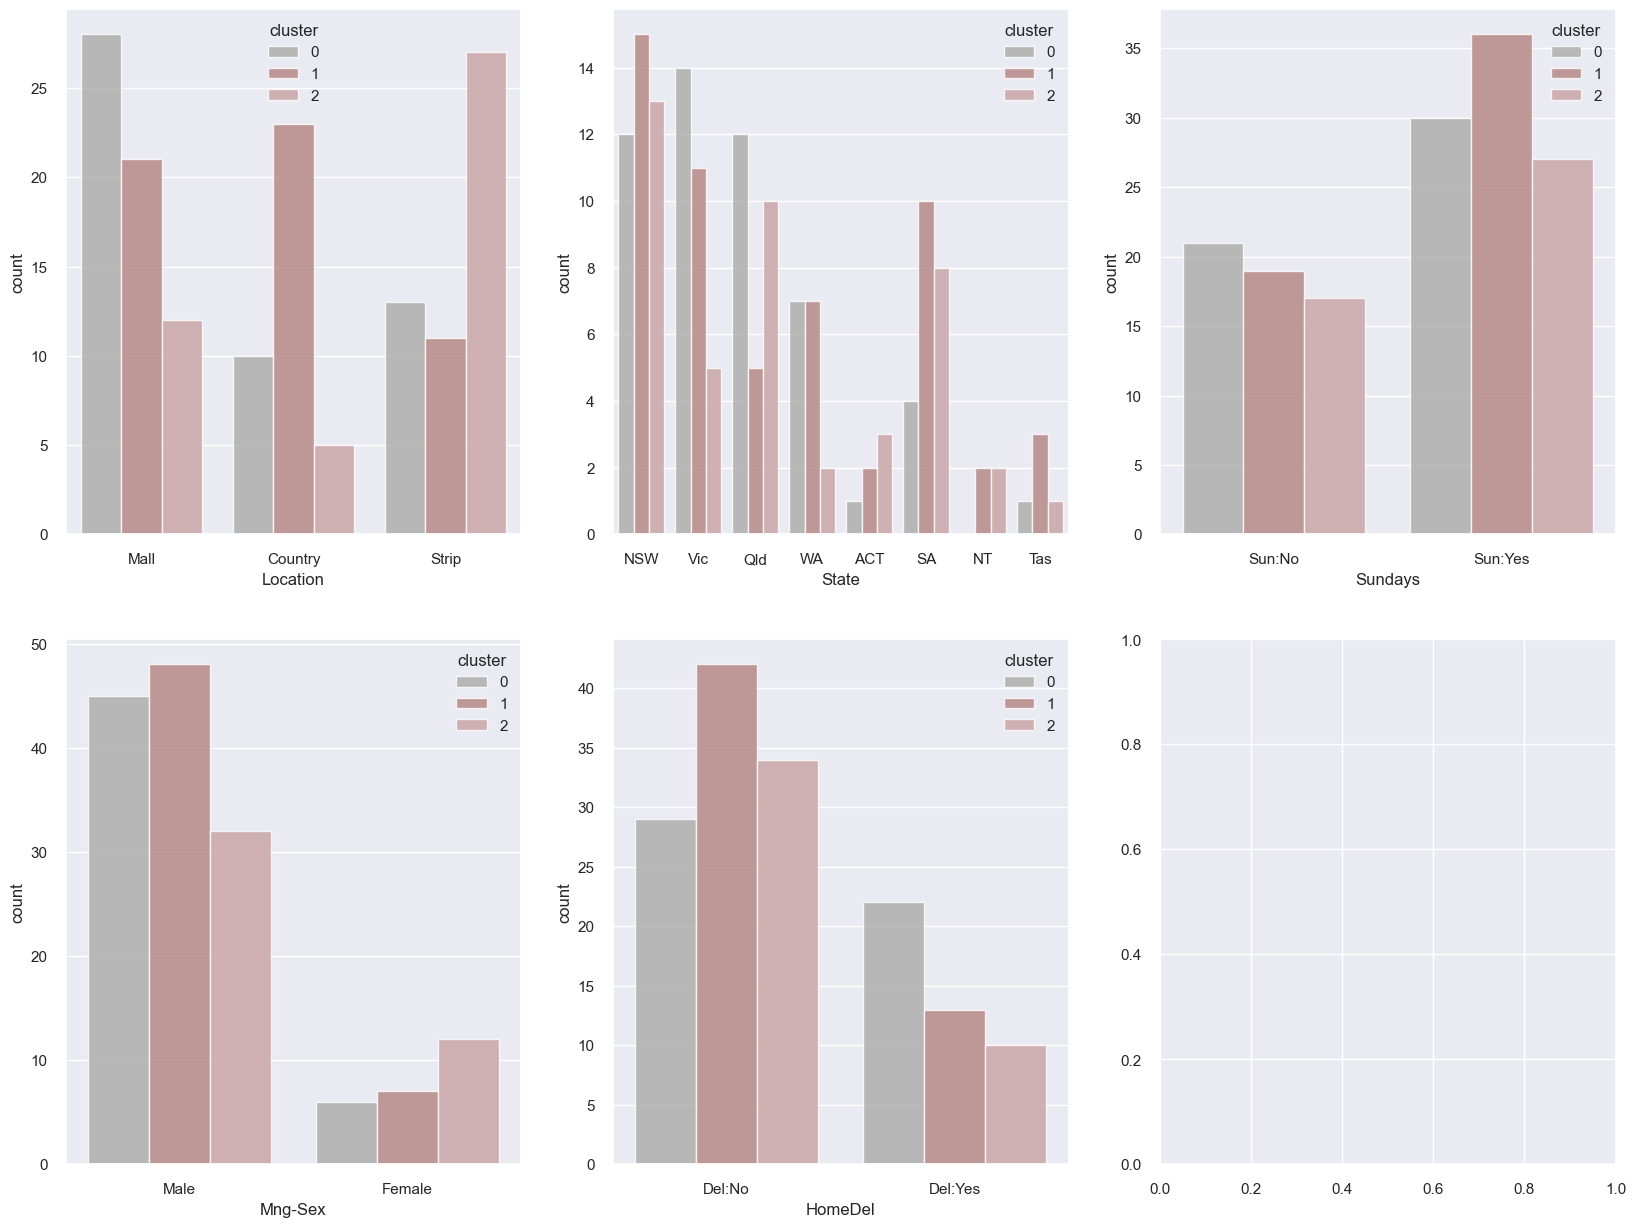

In [78]:
color_palette = ["#AAABA8","#BC7B77","#CD9B9D","#DBC7C9","#88A795","#A59CD3"]
sns.set(style="darkgrid")

fig, axs = plt.subplots(2,3, figsize=(20, 15))

sns.countplot(data=data_with_clusters, x="Location", hue="cluster", palette=color_palette, alpha=.8, ax=axs[0, 0])
sns.countplot(data=data_with_clusters, x="State", hue="cluster", palette=color_palette, alpha=.8, ax=axs[0, 1])
sns.countplot(data=data_with_clusters, x="Sundays", hue="cluster", palette=color_palette, alpha=.8, ax=axs[0, 2])
sns.countplot(data=data_with_clusters, x="Mng-Sex", hue="cluster", palette=color_palette, alpha=.8, ax=axs[1, 0])
sns.countplot(data=data_with_clusters, x="HomeDel", hue="cluster", palette=color_palette, alpha=.8, ax=axs[1, 1])

plt.show()

> ***observations:*** <br><br>
>  **cluster 0:**  
    <ul>
    <li> most of its stores are located in <strong>malls</strong></li>
    <li> most of its stores are located in <strong>New South Wales</strong> state </li>
    <li> has a higher number of stores that offer <strong>home delivery services</strong> compared to other clusters </li>
    </ul>
>  **cluster 1:**  
    <ul>
	<li> its stores are distributed relatively among locations, but the majority in standalone countries. </li>
    <li> most of its stores are located in <strong>New South Wales</strong> state </li>
    <li> most of its stores <strong>open on Sundays</strong> </li>
    </ul>
>  **cluster 2:**  
    <ul>
    <li> most of its stores are located in <strong>street shopping centres</strong> </li>
	<li> most of its stores are located in <strong> New South Wales, Queensland</strong> states </li>
    <li> most of its stores <strong>do not open on Sundays</strong> </li>
    <li> have more <strong>female managers</strong> compared to ather clusters </li>
    </ul>

#### 3.Multi-Layer Perceptron Neural Network

* Normalize the numerical features

In [79]:
X = data.copy()

In [80]:
pd.set_option('display.max_columns', None)
X.head()

Store No.  Sales $m  Wages $m  No. Staff Location  Loc'n (Num) State  \
0          1      12.5       2.3       60.0     Mall            2   NSW   
1          2      14.5       2.7       69.0     Mall            2   Vic   
2          3      19.0       3.1       79.0  Country            3   Vic   
3          4      18.2       2.6       66.0     Mall            2   Qld   
4          5       7.6       2.0       51.0    Strip            1   Qld   

   State (Num)  Age (Yrs)  GrossProfit  Competitors  HrsTrading  Sundays  \
0            1       10.0        0.712          3.0         110   Sun:No   
1            2        8.0        0.091          5.0         134   Sun:No   
2            2        7.0        1.075          2.0          98  Sun:Yes   
3            3        7.0        1.372          1.0          85  Sun:Yes   
4            3       15.0        2.148          0.0          72  Sun:Yes   

   Sundays (Num) Mng-Sex  Mng-Sex (Num)  Mng-Age  Mng-Exp  Mng-Train  Union%  \
0              0    Male              0     33.0     12.0        2.0    38.0   
1              0    Male              0     33.0     16.0        1.0    38.0   
2              1    Male              0     30.0      9.0        2.0    39.0   
3              1    Male              0     29.0      9.0        2.0    38.0   
4              1    Male              0     36.0      4.0        3.0    40.0   

   Car Spaces  HomeDel  HomeDel (Num)  Basket:2014  Adv.$m  
0        46.0   Del:No              0        178.0   0.171  
1        73.0   Del:No              0        178.0   0.213  
2        64.0   Del:No              0        188.0   0.255  
3        66.0  Del:Yes              1        180.0   0.287  
4        29.0   Del:No              0        171.0   0.112

In [81]:
X.drop(["Loc'n (Num)","State (Num)",'Sundays (Num)','Mng-Sex (Num)','HomeDel (Num)','Store No.'] , axis=1 , inplace = True)

In [82]:
from sklearn.preprocessing import StandardScaler

numerical = ['Wages $m', 'No. Staff', 'Age (Yrs)', 'GrossProfit', 'Adv.$m', 'Competitors', 'Mng-Age', 'Mng-Exp'
             , 'Mng-Train', 'Union%', 'Car Spaces', 'Basket:2014', 'HrsTrading']
X_numerical = X.loc[:, numerical]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

X_scaled= X.loc[:, numerical] 

In [83]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

*Apply MLP Neaural Network*

In [84]:
X = data.drop('Sales $m', axis=1)
y = data['Sales $m']

X = pd.get_dummies(X, columns=['Location', 'State', 'Sundays', 'Mng-Sex', 'HomeDel'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32)
history
model.save('trained_model.h5')

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 231.0074 - mean_squared_error: 231.0074
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 64.9864 - mean_squared_error: 64.9864
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 18.5519 - mean_squared_error: 18.5519
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 24.3974 - mean_squared_error: 24.3974
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 14.5434 - mean_squared_error: 14.5434
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 13.4294 - mean_squared_error: 13.4294
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 12.3870 - mean_squared_error: 12.3870
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 10.4835 - mean_squared_error: 10.4835
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 10.1223 - mean_squared_error: 10.1223
Epoch 10/100
4

*Use the MLP for predictions*

In [85]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 191ms/step


*Evaluate the MLP*

In [86]:
test_loss, test_mse = model.evaluate(X_test, y_test)
test_mse

1/1 [==============================] - 0s 269ms/step - loss: 2.7653 - mean_squared_error: 2.7653


2.765289068222046

In [87]:
from sklearn.metrics import r2_score
y_true = np.array(y_test).reshape(-1)
pred = np.array(y_pred).reshape(-1,1)

r_squared = r2_score(y_true,pred)

print("R-squared:", r_squared)

R-squared: 0.6403062073936896


In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# mean squared error
mse = mean_squared_error(y_true, y_pred)

# root mean squared error
rmse = np.sqrt(mse)

# mean absolute error
mae = mean_absolute_error(y_true, y_pred)

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("Mean absolute error:", mae)

Mean squared error: 2.7652884532388664
Root mean squared error: 1.6629156482632745
Mean absolute error: 1.0789014082166883


In [89]:
from sklearn.metrics import mean_absolute_percentage_error, explained_variance_score

# mean absolute percentage error
mape = mean_absolute_percentage_error(y_true, y_pred)

# explained variance
ev = explained_variance_score(y_true, y_pred)

print("Mean absolute percentage error:", mape)
print("Explained variance:", ev)

Mean absolute percentage error: 0.09680190358823
Explained variance: 0.6674400440083742


> ***observations:*** neural network has performed reasonably well, with a relatively low MSE, RMSE,MAE and MAPE<br>and with high Explained variance.

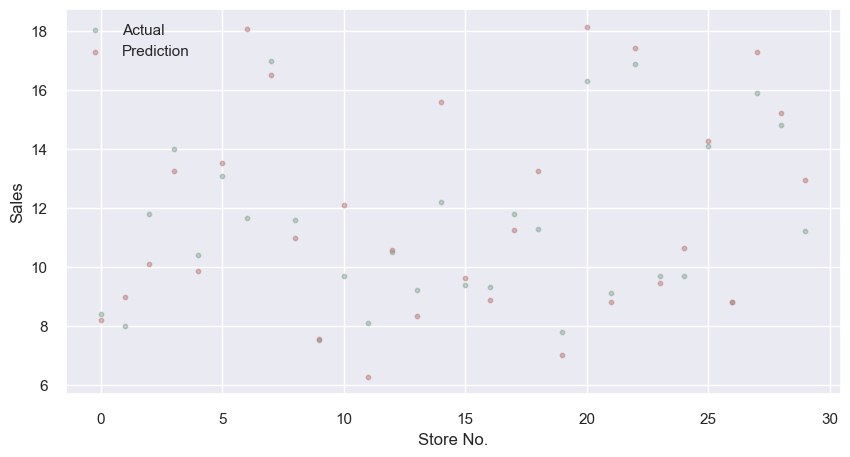

In [90]:
y_predections = np.array(y_pred).reshape(-1)

df_error = pd.DataFrame({"Actual": y_true, "Prediction": y_predections, "Error": y_true - y_predections})

df_error.reset_index(inplace=True)
df_error = df_error.sort_values("index")

fig = plt.figure(figsize=(10, 5))

plt.scatter(df_error["index"], df_error["Actual"], s=10, color = "#88A795", alpha=0.5)
plt.scatter(df_error["index"], df_error["Prediction"], s=10, color = "#BC7B77", alpha=0.5)
plt.xlabel("Store No.")
plt.ylabel("Sales")
plt.legend(["Actual", "Prediction"])

plt.show()

<br>
<i>Predict the sales of a new store with specific characteristics</i>

In [91]:
model = keras.models.load_model('trained_model.h5')
test_data = pd.DataFrame({
    'Store No.':[151],
    'Wages $m': [10.0],
    'No. Staff': [100],
    "Loc'n (Num)":[3],
    'Location_Strip': [0],
    'Location_Mall': [1],
    'Location_Country': [0],
    'State (Num)' :[2],
    'State_NSW': [0],
    'State_NT': [0],
    'State_QLD': [0],
    'State_SA': [0],
    'State_ACT': [0],
    'State_Vic': [1],
    'State_WA': [0],
    'Age (Yrs)': [5],
    'GrossProfit': [5.0],
    'Adv.$m': [50],
    'Competitors': [3],
    'HrsTrading': [80],
    'Sundays (Num)' :[1],
    'Sundays_Sun:No': [1],
    'Sundays_Sun:Yes': [0],
    'Mng-Sex (Num)' :[1],
    'Mng-Sex_Female': [1],
    'Mng-Sex_Male': [0],
    'Mng-Age': [40],
    'Mng-Exp': [5],
    'Mng-Train': [3],
    'Union%': [20],
    'Car Spaces': [50],
    'HomeDel (Num)':[0],
    'HomeDel_0': [1],
    'HomeDel_1': [0],
    'Basket:2013': [100],
    'Basket:2014': [110]
})

predicted_sales = model.predict(test_data)
predicted_sales_value = predicted_sales[0][0]
print("The predicted sales value for the new supermarket is {:.2f}.".format(predicted_sales_value))

1/1 [==============================] - 0s 142ms/step
The predicted sales value for the new supermarket is 27.12.


> ***Note***: This model can be used to predict sales of store with specific characteristics, and help the supermarket chain to make informed decision about opening a new store.

In [92]:
weights = model.layers[0].get_weights()[0]
importance_scores = np.abs(weights).sum(axis=1)

feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Features': feature_names,
    'Importance Scores': importance_scores
}).sort_values(by='Importance Scores', ascending=False)

print(importance_df)

            Features  Importance Scores
26          State_SA          11.449376
19  Location_Country          10.495035
16     HomeDel (Num)          10.314777
35   HomeDel_Del:Yes           9.887658
21    Location_Strip           9.503119
27         State_Tas           9.501432
34    HomeDel_Del:No           8.984900
29          State_WA           8.964995
32    Mng-Sex_Female           8.828468
33      Mng-Sex_Male           8.807114
3        Loc'n (Num)           8.764493
24          State_NT           8.759136
31   Sundays_Sun:Yes           8.508764
2          No. Staff           8.484642
28         State_Vic           8.466497
18            Adv.$m           8.418293
23         State_NSW           8.414433
15        Car Spaces           8.411278
11           Mng-Age           8.384598
12           Mng-Exp           8.360723
22         State_ACT           8.340616
25         State_Qld           8.330227
10     Mng-Sex (Num)           8.198994
7        Competitors           8.106483


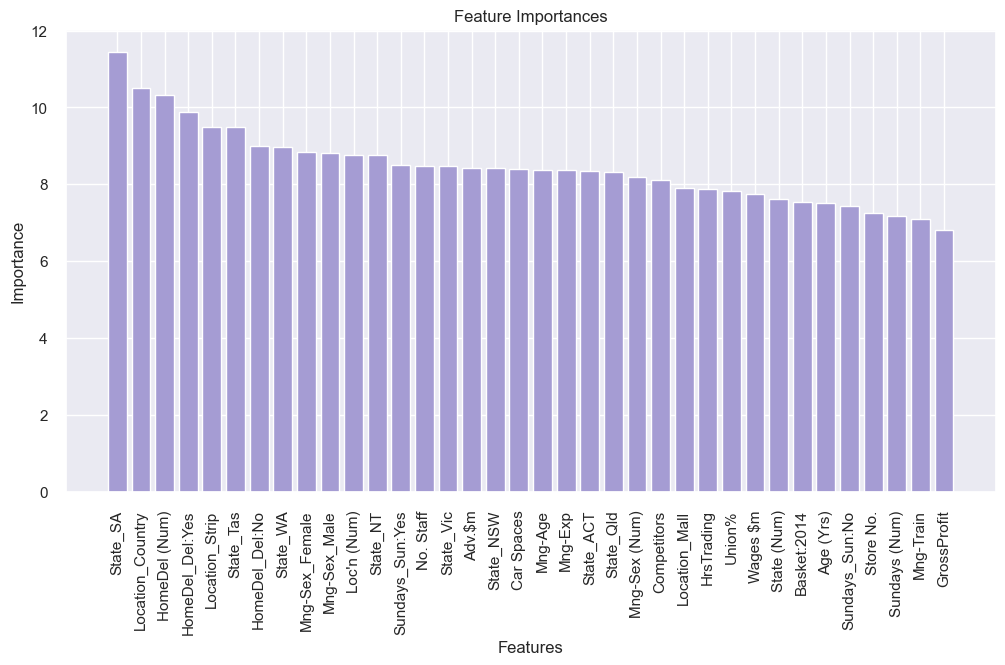

In [93]:
sorted_indices = importance_scores.argsort()[::-1]
sorted_features = feature_names[sorted_indices]
sorted_scores = importance_scores[sorted_indices]

plt.figure(figsize=(12, 6))

plt.bar(range(len(sorted_features)), sorted_scores, color="#A59CD3")
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')

plt.show()

> ***observations:*** <br>
    <ul>
	<li> Looking at the importance scores, we can see that Features with importance scores above 9.5 can be considered high importance like <strong>location,Sundays (Num), Adv.$m, HomeDel</strong> </li>
    <li> Features with importance scores below 8 can be considered low importance like <strong>HrsTrading, Mng_Train,  GrossProfit </strong> </li>
    </ul>

#### 4.Association rules

In [94]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

*Discover the association rules between sales and no.staff*

In [95]:
df = data[["Sales $m", "No. Staff"]].copy()
df = df.dropna()

df["Sales $m"] = pd.cut(df["Sales $m"], bins=3, labels=["low_sales", "medium_sales", "high_sales"])

df["No. Staff"] = pd.cut(df["No. Staff"], bins=3, labels=["low_staff", "medium_staff", "high_staff"])

transactions = []
for i in range(len(df)):
    transactions.append([str(df.values[i, j]) for j in range(len(df.columns))])

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

frequent_itemsets

support                      itemsets
0   0.126667                  (high_sales)
1   0.106667                  (high_staff)
2   0.500000                   (low_sales)
3   0.466667                   (low_staff)
4   0.373333                (medium_sales)
5   0.426667                (medium_staff)
6   0.053333      (high_sales, high_staff)
7   0.073333    (medium_staff, high_sales)
8   0.053333    (medium_sales, high_staff)
9   0.400000        (low_sales, low_staff)
10  0.100000     (low_sales, medium_staff)
11  0.066667     (medium_sales, low_staff)
12  0.253333  (medium_sales, medium_staff)

In [96]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules

antecedents     consequents  antecedent support  consequent support  \
0    (high_staff)    (high_sales)            0.106667            0.126667   
1    (high_sales)  (medium_staff)            0.126667            0.426667   
2    (high_staff)  (medium_sales)            0.106667            0.373333   
3     (low_sales)     (low_staff)            0.500000            0.466667   
4     (low_staff)     (low_sales)            0.466667            0.500000   
5  (medium_sales)  (medium_staff)            0.373333            0.426667   
6  (medium_staff)  (medium_sales)            0.426667            0.373333   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.053333    0.500000  3.947368  0.039822    1.746667       0.835821  
1  0.073333    0.578947  1.356908  0.019289    1.361667       0.301180  
2  0.053333    0.500000  1.339286  0.013511    1.253333       0.283582  
3  0.400000    0.800000  1.714286  0.166667    2.666667       0.833333  
4  0.400000    0.857143  1.714286  0.166667    3.500000       0.781250  
5  0.253333    0.678571  1.590402  0.094044    1.783704       0.592385  
6  0.253333    0.593750  1.590402  0.094044    1.542564       0.647491

> ***Observations:***
   <br>Sales and the number of effective staff are strongly related and have Mutual effect on each other

*Discover the association rules between Sales $m and Car Spaces*

In [97]:
df = data[["Sales $m", "Car Spaces"]].copy()
df = df.dropna()

df["Sales $m"] = pd.cut(df["Sales $m"], bins=3, labels=["low_sales", "medium_sales", "high_sales"])

df["Car Space"] = pd.cut(df["Car Spaces"], bins=3, labels=["small_spaces", "medium_spaces", "large_spaces"])

transactions = []
for i in range(len(df)):
    transactions.append([str(df.values[i, j]) for j in range(len(df.columns))])

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

frequent_itemsets

support                       itemsets
0   0.126667                   (high_sales)
1   0.093333                 (large_spaces)
2   0.500000                    (low_sales)
3   0.373333                 (medium_sales)
4   0.373333                (medium_spaces)
5   0.533333                 (small_spaces)
6   0.066667    (medium_spaces, high_sales)
7   0.073333     (low_sales, medium_spaces)
8   0.413333      (low_sales, small_spaces)
9   0.233333  (medium_sales, medium_spaces)
10  0.093333   (medium_sales, small_spaces)

In [98]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules

antecedents      consequents  antecedent support  consequent support  \
0     (high_sales)  (medium_spaces)            0.126667            0.373333   
1      (low_sales)   (small_spaces)            0.500000            0.533333   
2   (small_spaces)      (low_sales)            0.533333            0.500000   
3   (medium_sales)  (medium_spaces)            0.373333            0.373333   
4  (medium_spaces)   (medium_sales)            0.373333            0.373333   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.066667    0.526316  1.409774  0.019378    1.322963       0.332824  
1  0.413333    0.826667  1.550000  0.146667    2.692308       0.709677  
2  0.413333    0.775000  1.550000  0.146667    2.222222       0.760369  
3  0.233333    0.625000  1.674107  0.093956    1.671111       0.642553  
4  0.233333    0.625000  1.674107  0.093956    1.671111       0.642553

> ***Observations:***
   <br>Sales and the number of available parking space are strongly related

*Discover the association rules between Female managers and Advertising and promotional expenses*

In [99]:
df = data[["Mng-Sex", "Adv.$m"]].copy()
df = df.dropna()

df["Adv.$m"] = pd.cut(df["Adv.$m"], bins=3, labels=["low_adv", "medium_adv", "high_adv"])

df["Mng-Sex"] = df["Mng-Sex"].astype(str)

transactions = []
for i in range(len(df)):
    transactions.append([str(df.values[i, j]) for j in range(len(df.columns))])

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

frequent_itemsets_female = frequent_itemsets.loc[frequent_itemsets['itemsets'].apply(lambda x: 'Female' in x)]
frequent_itemsets_female 

support              itemsets
0  0.166667              (Female)
5  0.093333     (Female, low_adv)
6  0.066667  (Female, medium_adv)

In [100]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules_female = rules.loc[rules['antecedents'].astype(str).str.contains('Female') | rules['consequents'].astype(str).str.contains('Female')]
rules_female

antecedents consequents  antecedent support  consequent support   support  \
0    (Female)   (low_adv)            0.166667                 0.5  0.093333   

   confidence  lift  leverage  conviction  zhangs_metric  
0        0.56  1.12      0.01    1.136364       0.128571

> ***Observations:***
   <br> stores with female managers are more likely to have low advertising expenses.

*Discover the association rules between GrossProfit and Competitors*

In [101]:
df = data[["GrossProfit", "Competitors"]].copy()
df = df.dropna()

df["GrossProfit"] = pd.cut(df["GrossProfit"], bins=3, labels=["low_profit", "medium_profit", "high_profit"])

df["Competitors"] = pd.cut(df["Competitors"], bins=3, labels=["low_competitors", "medium_competitors", "high_competitors"])

transactions = []
for i in range(len(df)):
    transactions.append([str(df.values[i, j]) for j in range(len(df.columns))])

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets

support                          itemsets
0   0.153333                (high_competitors)
1   0.106667                     (high_profit)
2   0.546667                 (low_competitors)
3   0.486667                      (low_profit)
4   0.300000              (medium_competitors)
5   0.406667                   (medium_profit)
6   0.153333    (low_profit, high_competitors)
7   0.100000    (low_competitors, high_profit)
8   0.073333     (low_profit, low_competitors)
9   0.373333  (low_competitors, medium_profit)
10  0.260000  (low_profit, medium_competitors)

In [102]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=1)
rules

antecedents   consequents  antecedent support  consequent support  \
0  (high_competitors)  (low_profit)            0.153333            0.486667   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.153333         1.0  2.054795  0.078711         inf       0.606299

> ***Observations:***
   <br> As expected stores with high number of competing supermarkets have low profit.